In [5]:
import numpy as np
import matplotlib.pylab as plt
import re
from tables import open_file
from statistics import median
from scipy.optimize import curve_fit, minimize
class clean(object):
    def __init__(self, file_name):
        self.file_path = '/Users/cosmos2299/documents/data/'
        l = open_file(self.file_path + file_name)
        list(l)
    
        self.atstamp = l.root.absolute_timestamp[:].flatten()
        self.r_0 = l.root.rising_0[:].flatten()
        self.r_1 = l.root.rising_1[:].flatten()
        self.r_2 = l.root.rising_2[:].flatten()
        self.r_3 = l.root.rising_3[:].flatten()
        self.f_0 = l.root.falling_0[:].flatten()
        self.f_1 = l.root.falling_1[:].flatten()
        self.f_2 = l.root.falling_3[:].flatten()
        self.f_3 = l.root.falling_3[:].flatten()
    
        self.p_jumps = ((self.atstamp.size - self.atstamp[(self.atstamp < 1e11) & (self.atstamp > -1e7)].size)/
                         self.atstamp.size) * 100
        print('percentage of high jumps in the file -', self.p_jumps)
        print(self.atstamp.size)
        
        self.file_name = file_name
    
    #POCAM, sDOM, PMT, LED and voltage used
    def P_S_used(self):                                         
        POCAM_re = re.compile('P[1-2]')
        SDOM_re = re.compile('SDOM[1-5]')
        frequency_re = re.compile('[0-9][0-9][0-9][0-9]Hz')
        voltage_re = re.compile('[0-9][0-9]V')
        flash_time_re = re.compile('[0-9][0-9]s')
        LED_re = re.compile('P[0-9]_[a-z]')
        PMT_re = re.compile('hld_[a-z]')

        SDOM_num = SDOM_re.findall(self.file_name)
        self.POCAM_num = POCAM_re.findall(self.file_name)
        frequency = frequency_re.findall(self.file_name)
        voltage = voltage_re.findall(self.file_name)
        flash_time = flash_time_re.findall(self.file_name)
        LED = LED_re.findall(self.file_name)
        PMT = PMT_re.findall(self.file_name)
    
        if PMT == ['hld_d']:
            PMT = 'down'
        else:
            PMT = 'up'
    
        if LED == ['P1_b']:
            LED = 'blue'
        if LED == ['P1_v']:
            LED = 'violet'
    
        if LED == ['P2_b']:
            LED = 'blue'
        if LED == ['P2_v']:
            LED = 'violet'
    
        graph_title = [self.POCAM_num, SDOM_num,PMT, LED, voltage]
        self.values = ','.join(str(v) for v in graph_title)
         
    #timestamp graph
        plt.figure(figsize=(10,9))
        plt.title(self.values, fontsize = 22)
        plt.ylabel('absolute_timestamps(ns)', fontsize = 19)
        plt.xlabel('index', fontsize = 19)
        plt.plot(self.atstamp, '.')
        plt.savefig(self.file_path + '/graphs/' + self.values + 'high_jumps.jpeg', dpi = 200)
    
    #cleaning large jumps
        elim_h_jumps = (self.atstamp < 1e11) & (self.atstamp > -1e7)
        abs_elim = self.atstamp[elim_h_jumps]
        rising_0_elim = self.r_0[elim_h_jumps]
        rising_1_elim = self.r_1[elim_h_jumps]
        rising_2_elim = self.r_2[elim_h_jumps]
        rising_3_elim = self.r_3[elim_h_jumps]
        falling_0_elim = self.f_0[elim_h_jumps]
        falling_1_elim = self.f_1[elim_h_jumps]
        falling_2_elim = self.f_2[elim_h_jumps]
        falling_3_elim = self.f_3[elim_h_jumps]
    
        plt.figure(figsize=(10,9))
        plt.title(self.values, fontsize = 22)
        plt.ylabel('absolute_timestamp(ns)', fontsize = 19)
        plt.xlabel('index', fontsize = 19)
        plt.plot(abs_elim, '.')
        plt.savefig(self.file_path + '/graphs/' + self.values + 'high_jumps_cleaned.jpeg', dpi = 200)
        plt.show()
   
        plt.figure(figsize=(10,9))
        plt.title(self.values + ' Negative Timestamps', fontsize = 18)
        plt.ylabel('absolute_timestamp(ns)', fontsize = 19)
        plt.plot(abs_elim, '.')
        plt.ylim(-1e7, 0)
        plt.savefig(self.file_path + '/graphs/' + self.values + 'negative_values.jpeg', dpi = 200)
        plt.show()
    
    #cleaning negative values
        negative_index_values = []
        for r in range(0, abs_elim.size):
            if abs_elim[r] < 0:
                negative_index_values.append(r)
        if len(negative_index_values) == 0:
            start_value = 0
        else:
            start_value = max(negative_index_values) + 1
    
    #time difference graph
        abs_elim_2 = abs_elim[start_value:abs_elim.size]
        rising_0_elim_2 = rising_0_elim[start_value:abs_elim.size]
        rising_1_elim_2 = rising_1_elim[start_value:abs_elim.size]
        rising_2_elim_2 = rising_2_elim[start_value:abs_elim.size]
        rising_3_elim_2 = rising_3_elim[start_value:abs_elim.size]
        falling_0_elim_2 =  falling_0_elim[start_value:abs_elim.size]
        falling_1_elim_2 = falling_1_elim[start_value:abs_elim.size]
        falling_2_elim_2 = falling_2_elim[start_value:abs_elim.size]
        falling_3_elim_2 = falling_3_elim[start_value:abs_elim.size]
    
        abs_elim_diff = abs_elim_2[1:] - abs_elim_2[:-1]
        abs_elim_bool = abs_elim_2[:-1][abs_elim_diff < 0]
    
        plt.figure(figsize=(10,9))
        plt.title(self.values, fontsize = 22)
        plt.ylabel('absolute_timestamp difference(ns)', fontsize = 19)
        plt.xlabel('index', fontsize = 19)
        plt.plot(abs_elim_diff, '.')
        plt.savefig(self.file_path + '/graphs/' + self.values + 'timestamp_differences.jpeg', dpi = 200)
        plt.show()
    
        if abs_elim_bool.size != 0:
            plt.figure(figsize=(10,9))
            plt.ylabel('absolute_timestamp(ns)', fontsize = 19)
            plt.xlabel('index', fontsize = 19)
            plt.title(self.values + ' Jumps in Timestamps', fontsize = 16)
            plt.plot(abs_elim_2[abs_elim_diff.argmin()-10:abs_elim_diff.argmin()+10], '.')
            plt.savefig(self.file_path + '/graphs/' + self.values + 'small_jumps.jpeg', dpi = 200)
            plt.show()
    
    #cleaning small jumps
        abs_elim_diff_2 = abs_elim_2[1:] - abs_elim_2[:-1]
    
        s_jump_index = []
        s_jump_1 = []
        s_jump_2 = []
        list_1 = np.array([])

        for r in range(0, abs_elim_diff_2.size):
            if abs_elim_diff_2[r] < 0:
                s_jump_index.append(r)
                s_jump_1.append(abs_elim_diff_2[r])

        for t in range(0, len(s_jump_index)):
            select = abs_elim_diff_2[s_jump_index[t] - 10:s_jump_index[t]]
            x = s_jump_index[t] - (10 - (np.abs(select+abs_elim_diff_2[s_jump_index[t]])).argmin())
            jump_length = s_jump_index[t] - x
    
            if jump_length == 1:
                list_1 = np.append(list_1, [x+1])
            if jump_length == 2:
                list_1 = np.append(list_1,[x+1, x+2])
            if jump_length == 3:
                list_1 = np.append(list_1,[x+1, x+2, x+3])
            if jump_length == 4:
                list_1 = np.append(list_1,[x+1, x+2, x+3, x+4])
            if jump_length == 5:
                list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5])
            if jump_length == 6:
                list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5, x+6])
            if jump_length == 7:
                list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5, x+6, x+7])
            if jump_length == 8:
                list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5, x+6, x+7, x+8])
            if jump_length == 9:
                list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5, x+6, x+7, x+8, x+9])
            if jump_length == 10:
                list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5, x+6, x+7, x+8, x+9, x+10])
   
        print(list_1)
    
        abs_elim_3e = np.delete(abs_elim_2, list_1)
        self.abs_elim_diff_3 = abs_elim_3e[1:] - abs_elim_3e[:-1]
        
        rising_0_elim_3e = np.delete(rising_0_elim_2, list_1)
        rising_1_elim_3e = np.delete(rising_1_elim_2, list_1)
        rising_2_elim_3e = np.delete(rising_2_elim_2, list_1)
        rising_3_elim_3e = np.delete(rising_3_elim_2, list_1)
        falling_0_elim_3e = np.delete(falling_0_elim_2, list_1)
        falling_1_elim_3e = np.delete(falling_1_elim_2, list_1)
        falling_2_elim_3e = np.delete(falling_2_elim_2, list_1)
        falling_3_elim_3e = np.delete(falling_3_elim_2, list_1)
        
        #cleaning faulty falling time events
        boolean = ((falling_0_elim_3e != 0) & ((falling_1_elim_3e - rising_1_elim_3e) >= 0) & 
                   ((falling_2_elim_3e - rising_2_elim_3e) >= 0) & ((falling_3_elim_3e - rising_3_elim_3e) >= 0))
        abs_elim_3 = abs_elim_3e[boolean]
        rising_0_elim_3 = rising_0_elim_3e[boolean]
        rising_1_elim_3 = rising_1_elim_3e[boolean]
        rising_2_elim_3 = rising_2_elim_3e[boolean]
        rising_3_elim_3 = rising_3_elim_3e[boolean]
        falling_0_elim_3 = falling_0_elim_3e[boolean] 
        falling_1_elim_3 = falling_1_elim_3e[boolean]
        falling_2_elim_3 = falling_2_elim_3e[boolean]
        falling_3_elim_3 = falling_3_elim_3e[boolean]
        
        #cleaning faulty falling time events
        delete = []
        for i in range(0, abs_elim_3.size):
            if ((falling_1_elim_3[i] != 0 and rising_1_elim_3[i] == 0)
                or (falling_2_elim_3[i] != 0 and rising_2_elim_3[i] == 0)
                or (falling_3_elim_3[i] != 0 and rising_3_elim_3[i] == 0)
               ):
                delete.append(i)
        
        self.abs_elim_3 = np.delete(abs_elim_3, delete)
        self.rising_0_elim_3 = np.delete(rising_0_elim_3, delete)
        self.rising_1_elim_3 = np.delete(rising_1_elim_3, delete)
        self.rising_2_elim_3 = np.delete(rising_2_elim_3, delete)
        self.rising_3_elim_3 = np.delete(rising_3_elim_3, delete)
        self.falling_0_elim_3 = np.delete(falling_0_elim_3, delete)
        self.falling_1_elim_3 = np.delete(falling_1_elim_3, delete)
        self.falling_2_elim_3 = np.delete(falling_2_elim_3, delete)
        self.falling_3_elim_3 = np.delete(falling_3_elim_3, delete)        
    
        plt.figure(figsize=(10,9))
        plt.title(self.values, fontsize = 22)
        plt.ylabel('absolute_timestamp difference(ns)', fontsize = 19)
        plt.xlabel('index', fontsize = 19)
        plt.plot(self.abs_elim_diff_3, '.')
        plt.savefig(self.file_path + '/graphs/' + self.values + 'small_jumps_cleaned.jpeg', dpi = 200)
        plt.show()
        
        return (self.abs_elim_3,self.rising_0_elim_3, self.rising_1_elim_3, self.rising_2_elim_3, self.rising_3_elim_3,
                self.falling_0_elim_3, self.falling_1_elim_3, self.falling_2_elim_3, self.falling_3_elim_3, 
                self.POCAM_num, self.values, self.atstamp, self.p_jumps)

In [6]:
class residual(object):
    def res(self, rising_a_elim_3, upper_bound, lower_bound, dev_median):
        
        #selcting 'POCAM' flashes
        t_threshold = abs_elim_3[rising_a_elim_3 > 0] + rising_a_elim_3[rising_a_elim_3 > 0]
        t_diff = t_threshold[1:] - t_threshold[:-1]
        events_in_peak = t_threshold[:-1][(t_diff[:] > 200080) & (t_diff[:] < 200120)]

        if POCAM_num ==['P1']:
            estimate_peak = 200100.71
        if POCAM_num == ['P2']:
            estimate_peak = 200100.33
    
        estimate_residual = events_in_peak%estimate_peak
    
        plt.figure(figsize=(10,9))
        plt.plot(events_in_peak, estimate_residual, '.')
        plt.title(values + '-time residuals of threshold 1', fontsize = 19)
        plt.xlabel('timestamps', fontsize = 16)
        plt.ylabel('time residuals', fontsize = 16)
    
        est_res_diff = estimate_residual[1:] - estimate_residual[:-1]
        jump_index = []
        for r in range(0, est_res_diff.size):
            if est_res_diff[r] > upper_bound or est_res_diff[r] < lower_bound:
                jump_index.append(r)
        
        self.peak_1 = []
        t_res = np.array([])
        t_res_all = np.array([])

        for p in range(0, len(jump_index)):
            print("index_p", p)
            
            #selecting runs
            if p == 0 and jump_index[p] != 0:
                v = events_in_peak[:][(events_in_peak[:] >= events_in_peak[0]) & 
                                  (events_in_peak[:] < events_in_peak[jump_index[p+1]])]
                b = events_in_peak[jump_index[p+1]]
                if v.size == 0:
                    continue
    
            elif p == len(jump_index) - 1:
                v = events_in_peak[:][(events_in_peak[:] >= events_in_peak[jump_index[p]+1]) & 
                                  (events_in_peak[:] < events_in_peak[events_in_peak.size - 1])]
                b = events_in_peak[events_in_peak.size - 1]
                if v.size == 0:
                    continue
            else:    
                v = events_in_peak[:][(events_in_peak[:] >= events_in_peak[jump_index[p]+1]) & 
                                  (events_in_peak[:] < events_in_peak[jump_index[p+1] + 1])]
                b = events_in_peak[jump_index[p+1]+1]
                if v.size == 0:
                    continue
    
            a = min(v)

            run_time = abs_elim_3[(abs_elim_3 >= a) & (abs_elim_3 < b)]
    
            #Minimizer
            tmin = v[0]
            tmax = v[v.size-1]
            def dfunc2(delta_t):
                x = events_in_peak
                tres = x%delta_t
                selection = (events_in_peak>tmin)*(events_in_peak<tmax)
                return np.sum((tres[selection]-tres[selection].mean())**2)
        
            from scipy.optimize import minimize
            m = minimize(dfunc2, [200100.], method='Powell')
            print(m)
            print(m.x)
            gaus_peak = m.x
            time_res = v%gaus_peak
            time_res_all = run_time%gaus_peak
            print('time_res length', time_res.size)
    
            #Gaussian fit
            med = median(time_res)
            med_all = median(time_res_all)
            peak = time_res[(time_res >= med - dev_median) & (time_res <= med + dev_median)]
            peak_all = time_res_all[(time_res_all >= med_all - dev_median) & (time_res_all <= med_all + dev_median)]
    
            def gaussian(x, mean, amplitude, standard_deviation):
                return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

            bins = np.linspace(med-dev_median, med + dev_median, 11)
            bins_all = np.linspace(med-dev_median, med + dev_median, 11)
            data_entries_1, bins_1, _ = plt.hist(peak, bins, alpha = 0.1)
            data_entries_1_all, bins_1_all, _ = plt.hist(peak_all, bins_all, alpha = 0.1)
    
            data = peak
            data_all = peak_all
            bincenters = ((bins[:-1]+bins[1:])/2)
            bincenters_all = ((bins_all[:-1]+bins_all[1:])/2)
    
            from scipy.optimize import curve_fit
            data_entries = data_entries_1
            popt, pcov = curve_fit(gaussian, xdata = bincenters, 
                                    ydata = data_entries,  
                                    absolute_sigma = True, 
                                    p0 = (med, 10, 5),
                                    sigma = np.sqrt(data_entries))
            data_entries_all = data_entries_1_all
    
            popt_all, pcov_all = curve_fit(gaussian, xdata = bincenters_all, 
                                            ydata = data_entries_all,  
                                            absolute_sigma = True, 
                                            p0 = (med, 10, 5),
                                            sigma = np.sqrt(data_entries_all))
    
            time_res_sub = time_res - popt[0]
            time_res_sub_all = time_res_all - popt_all[0]
    
            self.peak_1.append(time_res_sub)

            print(popt)
            print(popt_all)
            t_res =np.append(t_res, time_res_sub)
            t_res_all =np.append(t_res_all, time_res_sub_all)
            print('t_res_all length', t_res.size)
            print('t_res_all length_all', t_res_all.size)
            
        #POCAM events
        plt.figure(figsize=(10,9))
        n, bins, patches = plt.hist(t_res, 70, log = True)
        plt.title(values + '-time residuals of threshold 2', fontsize = 19)
        plt.xlabel('time_ns', fontsize = 16)
        plt.ylabel('bincount', fontsize = 16)
        
        #All events included
        plt.figure(figsize=(10,9))
        n, bins, patches = plt.hist(t_res_all, np.linspace(-100, 200, 480), log = True)
        #n, bins, patches = plt.hist(t_res_all_all, 300, log = False)
        plt.title(values + '-time residuals of threshold 2', fontsize = 19)
        plt.xlabel('time_ns', fontsize = 16)
        plt.ylabel('bincount', fontsize = 16)
        #plt.xlim(-20, 20)
        plt.axvline(color = 'r')
        
        num_events = t_res_all[(t_res_all > -10) & (t_res_all < 10)]
        print(num_events.size)
        return num_events.size
    
    def CheckPeak(self):
        plt.figure(figsize=(10,9))
        for b in range(0, len(self.peak_1)):
            #plt.figure(figsize=(10,9))
            n, bins, patches = plt.hist(self.peak_1[b], 11, alpha = 0.4, log = True)
        plt.title(values + '-time residuals of threshold 1', fontsize = 19)
        plt.xlabel('time_ns', fontsize = 16)
        plt.ylabel('bincount', fontsize = 16)

In [7]:
def run_time(abs_timestamp, jumps):
    # removing negative timestamps
    negative_index_values = []
    for r in range(0, abs_timestamp.size):
        if abs_timestamp[r] < 0 and abs_timestamp[r] > -1e7:
            negative_index_values.append(r)

    if len(negative_index_values) != 0:
        r_negative_stamp = abs_timestamp[max(negative_index_values)+1:]
    else:
        r_negative_stamp = abs_timestamp[:]
    
    store_index = []
    for index, value in enumerate(r_negative_stamp):
        if r_negative_stamp[index] <= -1e7 or r_negative_stamp[index] >= 1e11:
            store_index.append(index)
            #print(index, value)
    #high jumps
    store_sum = ([])
    if jumps == 0.0:
        sum_1 = r_negative_stamp[r_negative_stamp.size - 1] - r_negative_stamp[0]
        
    else:
        for k in range(0, len(store_index)):
            if k == 0 and store_index[k] != 0:
                p = r_negative_stamp[store_index[k]-1] - r_negative_stamp[0]
            elif k == len(store_index) - 1:
                p = r_negative_stamp[r_negative_stamp.size - 1] - r_negative_stamp[store_index[k]+1]
            else:
                p = r_negative_stamp[store_index[k+1]-1] - r_negative_stamp[store_index[k] + 1]
    
            store_sum = np.append(store_sum, p)
        
            sum_1 = sum(store_sum[:])
    r_high_jumps = r_negative_stamp[(r_negative_stamp < 1e11) & (r_negative_stamp > -1e7)]
        
    r_high_diff = r_high_jumps[1:] - r_high_jumps[:-1]
    
    s_jump_index = []
    s_jump_1 = []
    s_jump_2 = []
    list_1 = ([])

    for r in range(0, r_high_diff.size):
        if r_high_diff[r] < 0:  
            s_jump_index.append(r)
            s_jump_1.append(r_high_diff[r])
            #print(s_jump_index)

    for t in range(0, len(s_jump_index)):
        #print("index",s_jump_index[t])
        #print("index value", abs_elim_diff_2[s_jump_index[t]])
    
        select =r_high_diff[s_jump_index[t] - 10:s_jump_index[t]]
        #print("select", select)
        x = s_jump_index[t] - (10 - (np.abs(select+r_high_diff[s_jump_index[t]])).argmin())
        #print("argmin", np.abs(select+abs_elim_diff_2[s_jump_index[t]]).argmin())
        #print(x)
    
        jump_length = s_jump_index[t] - x
    
        #print("jump length", jump_length)
    
       # print("abs_elim_2.size",abs_elim_2.size)
        if jump_length == 1:
            list_1 = np.append(list_1, [x+1])
        if jump_length == 2:
            list_1 = np.append(list_1,[x+1, x+2])
        if jump_length == 3:
            list_1 = np.append(list_1,[x+1, x+2, x+3])
        if jump_length == 4:
            list_1 = np.append(list_1,[x+1, x+2, x+3, x+4])
        if jump_length == 5:
            list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5])
        if jump_length == 6:
            list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5, x+6])
        if jump_length == 7:
            list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5, x+6, x+7])
        if jump_length == 8:
            list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5, x+6, x+7, x+8])
        if jump_length == 9:
            list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5, x+6, x+7, x+8, x+9])
        if jump_length == 10:
            list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5, x+6, x+7, x+8, x+9, x+10])
            
    if len(list_1) == 0:
        run_time = sum_1
    else:
        list_int = list_1.astype(int)
        # small jumps
        store_sum_1 = []
        store_sum_2 = ([])
        for k in range(0, len(list_int)):
            if k == 0 and list_int[k] != 0:
                po = r_high_jumps[list_int[k]-1]
                store_sum_1.append(po)
                print(k,list_int[k], po, 'p')
                if list_int[k] != list_int[k+1] - 1:
                    po = r_high_jumps[list_int[k+1]-1]
                    qo = r_high_jumps[list_int[k] + 1]
                    print(k, list_int[k], po, 'p')
                    print(k, list_int[k], qo, 'q')
                    store_sum_1.append(po)
                    store_sum_2 = np.append(store_sum_2, qo)
            elif k == len(list_int) - 1:
                qo = r_high_jumps[list_int[k]+1]
                store_sum_2 = np.append(store_sum_2, qo)
                print(k,list_int[k],qo, 'q')
            elif list_int[k+1] == list_int[k]+1:
                continue
            elif list_int[k] != list_int[k+1] - 1:
                po = r_high_jumps[list_int[k+1]-1]
                qo = r_high_jumps[list_int[k] + 1]
                print(k, list_int[k], po, 'p')
                print(k, list_int[k], qo, 'q')
                store_sum_1.append(po)
                store_sum_2 = np.append(store_sum_2, qo)
            #print(k, p)

            #store_sum_1.append(po)
            #store_sum_2 = np.append(store_sum_2, qo)
        
        sum_2 = sum(store_sum_2 - store_sum_1)
        run_time = sum_1 - sum_2
        print('time removed(small jumps) - ', sum_2)
     
    print('timestamp of the last event - ', abs_timestamp[abs_timestamp.size - 1])
    print('eliminating high jumps and summing - ', sum_1)
    print('run time - ', run_time)
    
    run_time = run_time * 1e-9
    return run_time

In [8]:
a = clean('20181205_092552_UTC_SDOM1_FLASH_SANTACLAUS_P1_violet_both_5000Hz_14V_60s_18339125343.hld_up.hdf5')

percentage of high jumps in the file - 0.26898878453542446
1645050


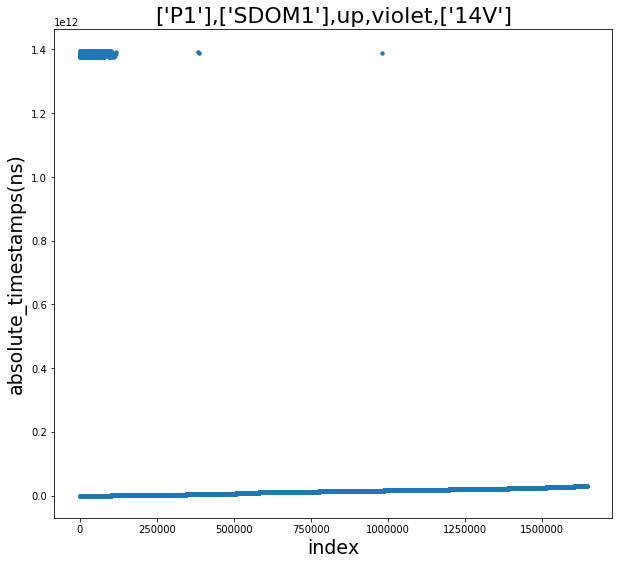

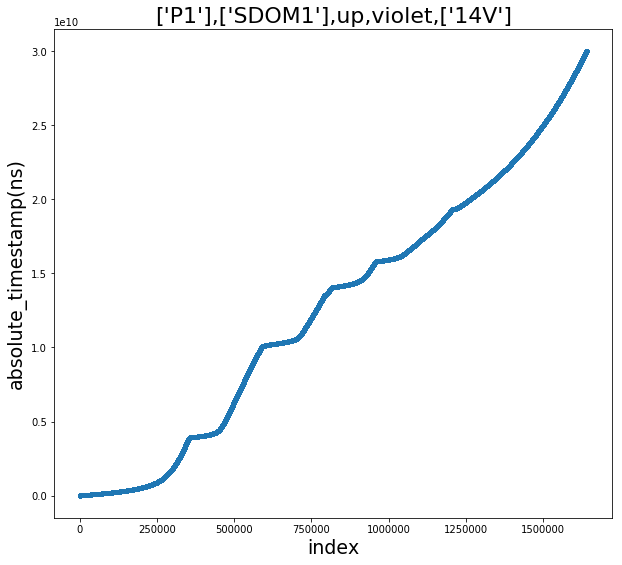

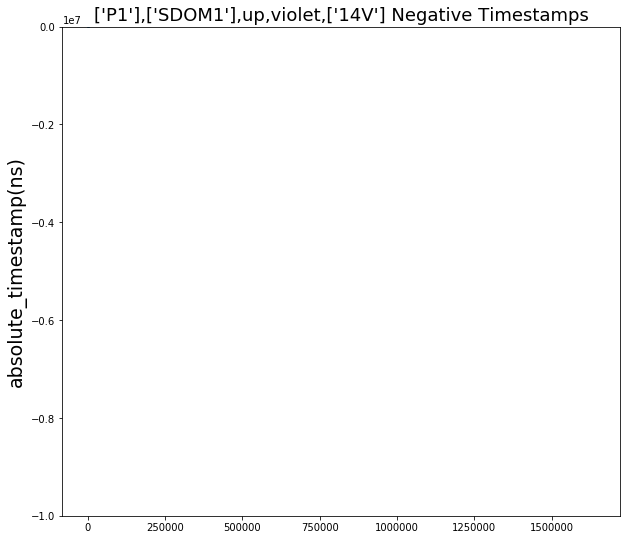

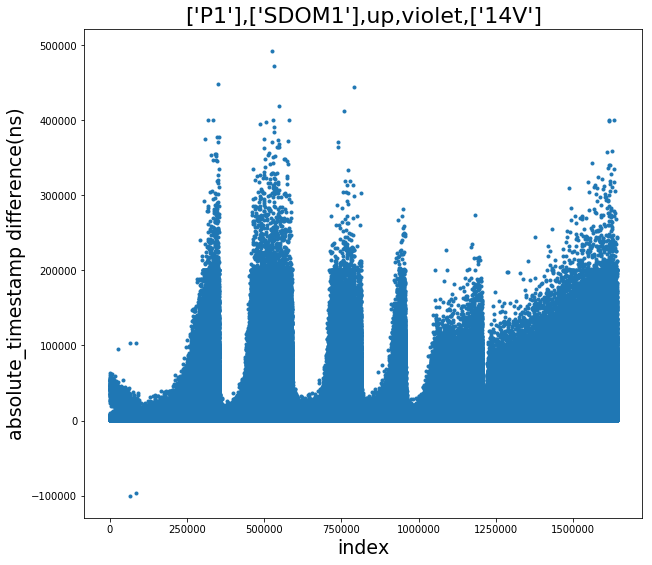

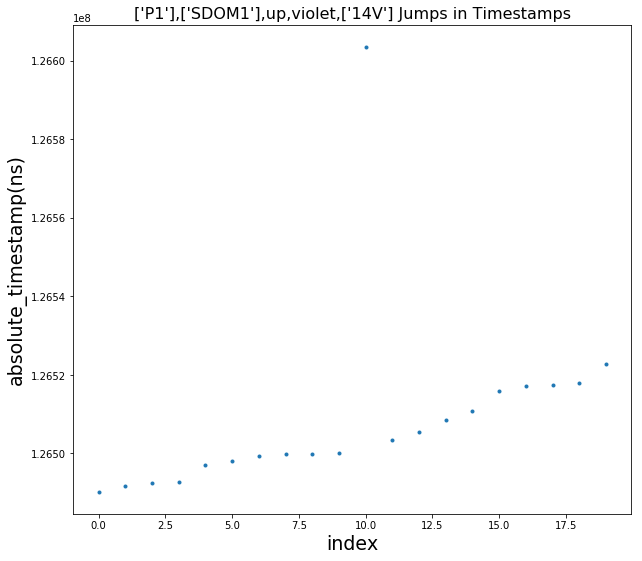

[66154. 84360. 84361. 84362. 84363. 84364.]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:184: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:187: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:188: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:189: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:190: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:191: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the futur

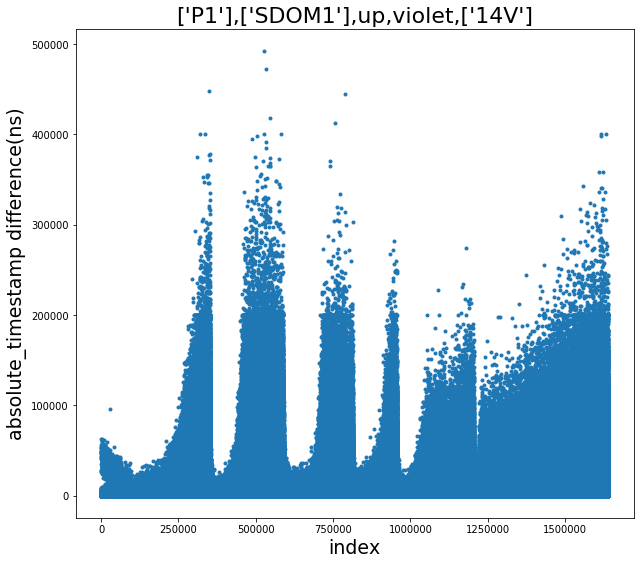

In [9]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps) = a.P_S_used()

In [10]:
r = residual()

index_p 0
   direc: array([[-8.34217189e-12]])
     fun: 501.2224769653757
 message: 'Optimization terminated successfully.'
    nfev: 35
     nit: 2
  status: 0
 success: True
       x: array(200100.71718804)
200100.7171880445
time_res length 35
[1.44393761e+05 1.00000000e+01 5.00000000e+00]
[1.44393761e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 35
t_res_all length_all 55953
index_p 1
   direc: array([[1.]])
     fun: 7767.229227487404
 message: 'Optimization terminated successfully.'
    nfev: 19
     nit: 2
  status: 0
 success: True
       x: array(200100.71682066)
200100.71682066156
time_res length 358
[1.44394822e+05 7.00171928e+01 5.52626791e+00]
[1.44394765e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 393
t_res_all length_all 99770
index_p 2
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[6.3392835e+04

/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:728: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice.
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[1.44396124e+05 3.61713885e+02 5.64379580e+00]
[1.44396137e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 2257
t_res_all length_all 319764
index_p 4
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[6.49174569e+04 1.00000000e+01 5.00000000e+00]
[6.49174569e+04 1.00000000e+01 5.00000000e+00]
t_res_all length 2258
t_res_all length_all 319783
index_p 5
   direc: array([[4.03652221e-11]])
     fun: 8317.454436778437
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 2
  status: 0
 success: True
       x: array(200100.7166276)
200100.71662760378
time_res length 434
[1.44399477e+05 8.98975994e+01 5.13343027e+00]
[1.44399758e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 2692
t_res_all length_all 477537
index_p 6
   direc: array([[1.]])
     fun: 19728.548472863076
 message: 'Optimization terminated suc

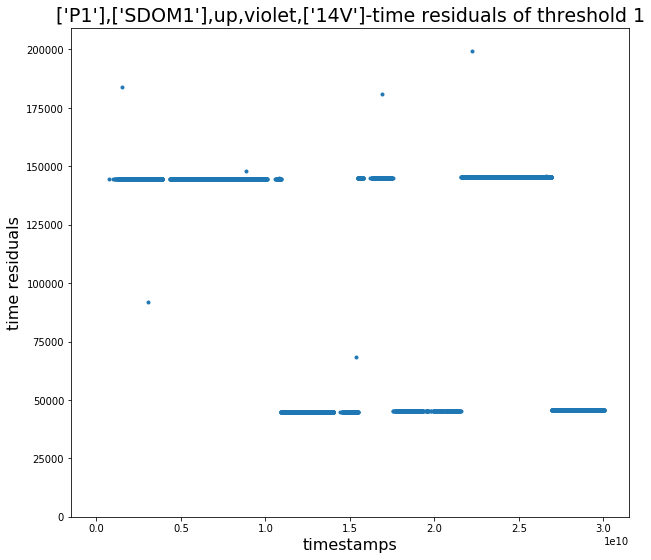

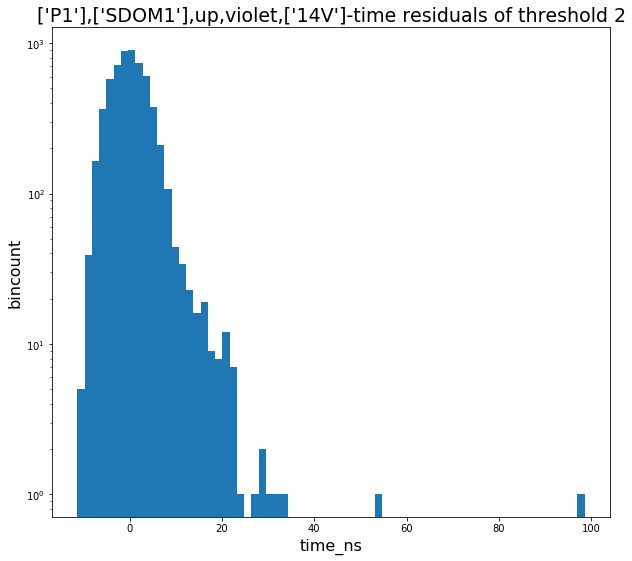

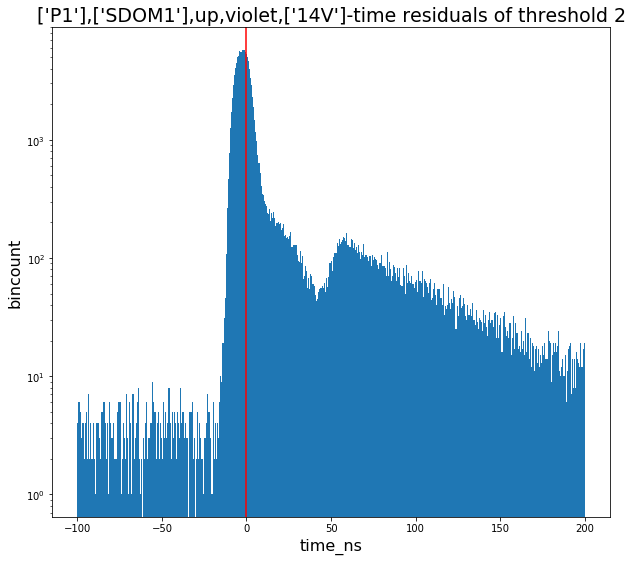

In [11]:
num_events = r.res(rising_1_elim_3, 100, -100, 10)

In [13]:
b = clean('20181205_092552_UTC_SDOM5_FLASH_SANTACLAUS_P1_violet_both_5000Hz_14V_60s_18339125343.hld_up.hdf5')

percentage of high jumps in the file - 0.0
339766


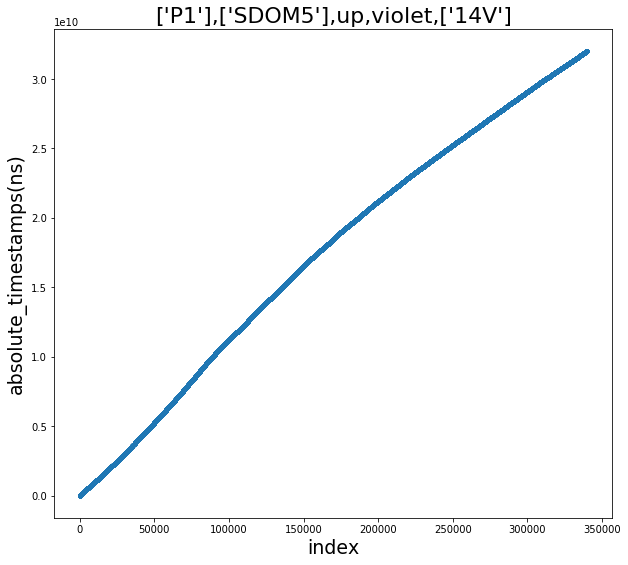

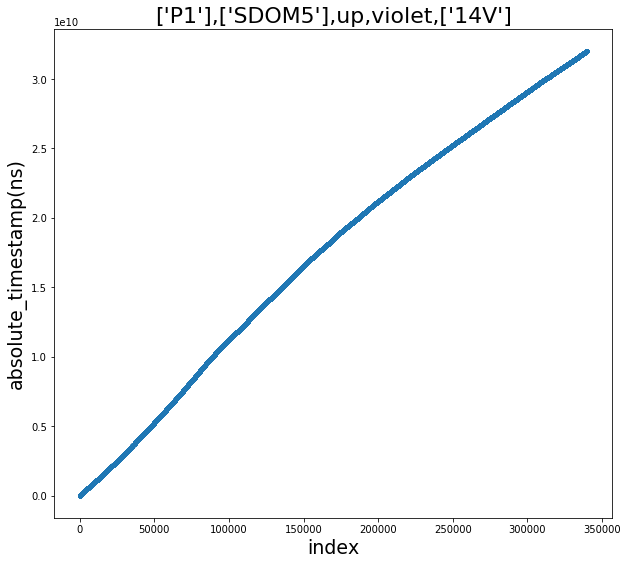

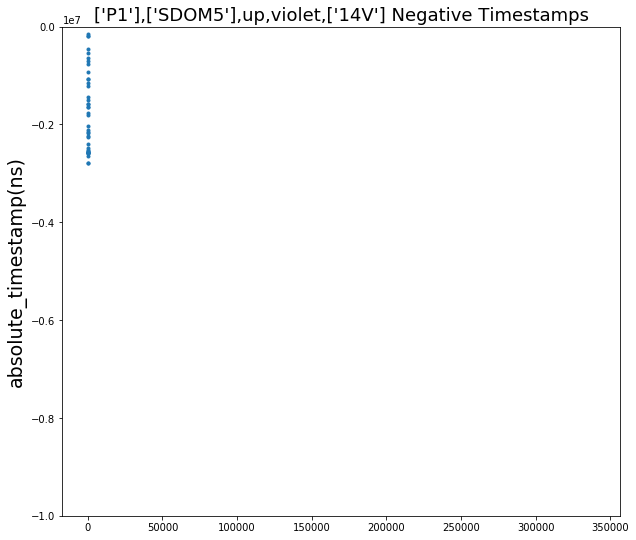

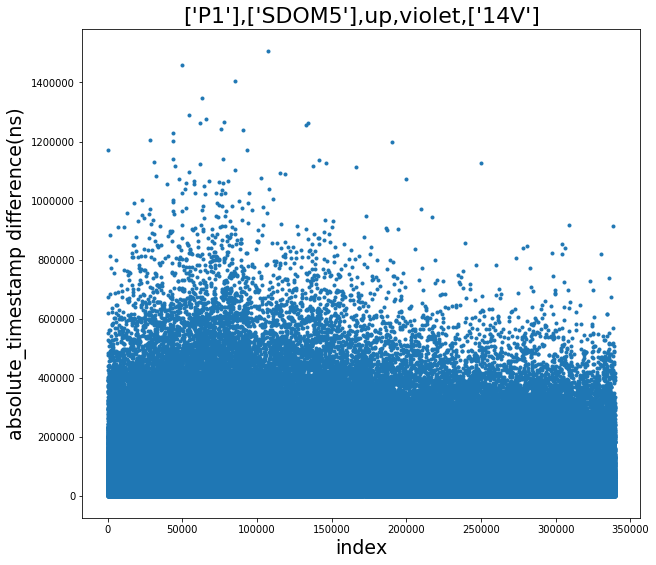

[]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:184: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:187: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:188: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:189: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:190: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:191: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the futur

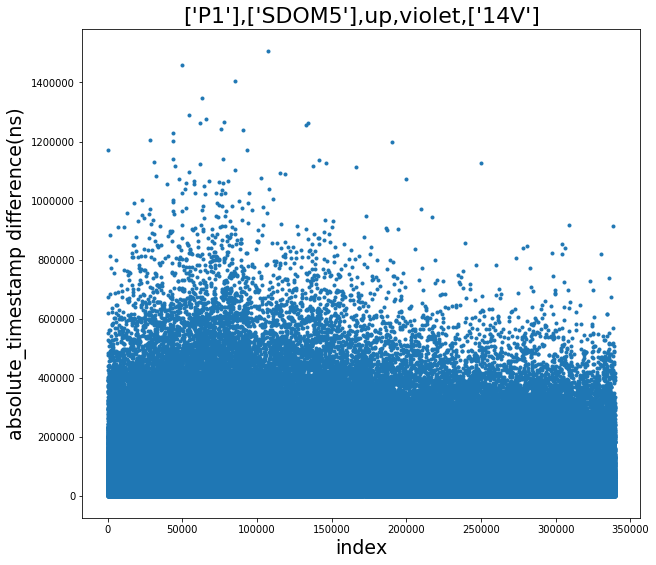

In [14]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps) = b.P_S_used()

In [15]:
r1 = residual()

index_p 0
   direc: array([[-2.26253633e-11]])
     fun: 1334.546832791877
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 2
  status: 0
 success: True
       x: array(200100.71510349)
200100.71510348763
time_res length 6
[1.11350794e+05 1.00000000e+01 5.00000000e+00]
[1.11350794e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 6
t_res_all length_all 29422
index_p 1
   direc: array([[-1.43569971e-11]])
     fun: 232.1546085210035
 message: 'Optimization terminated successfully.'
    nfev: 58
     nit: 2
  status: 0
 success: True
       x: array(200100.71427846)
200100.71427846054
time_res length 12
[1.11346092e+05 1.00000000e+01 5.00000000e+00]
[1.11346092e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 18
t_res_all length_all 56473
index_p 2
   direc: array([[7.68068967e-12]])
     fun: 228.64281300553483
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 2
  status: 0
 success: True
       x: array(200100.71485143)
200100.7148514

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice.


[1.16873547e+04 1.00000000e+01 5.00000000e+00]
[1.16873547e+04 1.00000000e+01 5.00000000e+00]
t_res_all length 46
t_res_all length_all 215379
index_p 9
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[7.45418212e+04 1.00000000e+01 5.00000000e+00]
[7.45418212e+04 1.00000000e+01 5.00000000e+00]
t_res_all length 47
t_res_all length_all 218096
index_p 10
   direc: array([[4.10666332e-11]])
     fun: 461.7759230589528
 message: 'Optimization terminated successfully.'
    nfev: 61
     nit: 2
  status: 0
 success: True
       x: array(200100.7141412)
200100.71414120088
time_res length 11
[1.17253687e+04 1.00000000e+01 5.00000000e+00]
[1.17253687e+04 1.00000000e+01 5.00000000e+00]
t_res_all length 58
t_res_all length_all 258469
index_p 11
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev

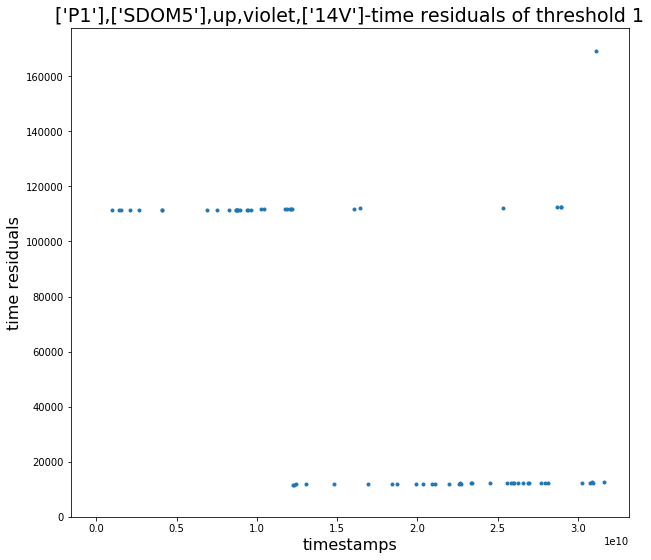

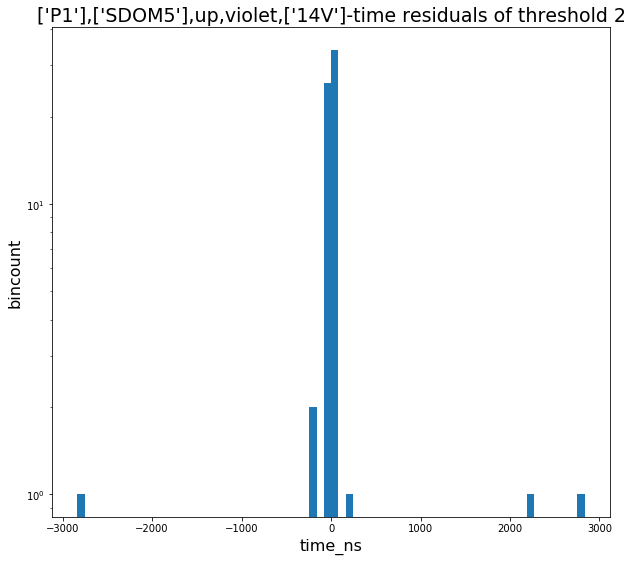

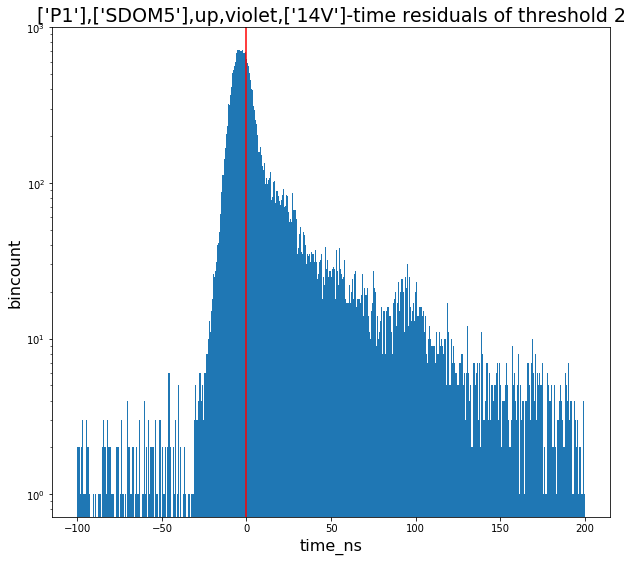

In [16]:
num_events = r1.res(rising_1_elim_3, 30, -30, 7)

In [17]:
c = clean('20181205_092552_UTC_SDOM2_FLASH_SANTACLAUS_P1_violet_both_5000Hz_14V_60s_18339125343.hld_up.hdf5')

percentage of high jumps in the file - 0.0
752947


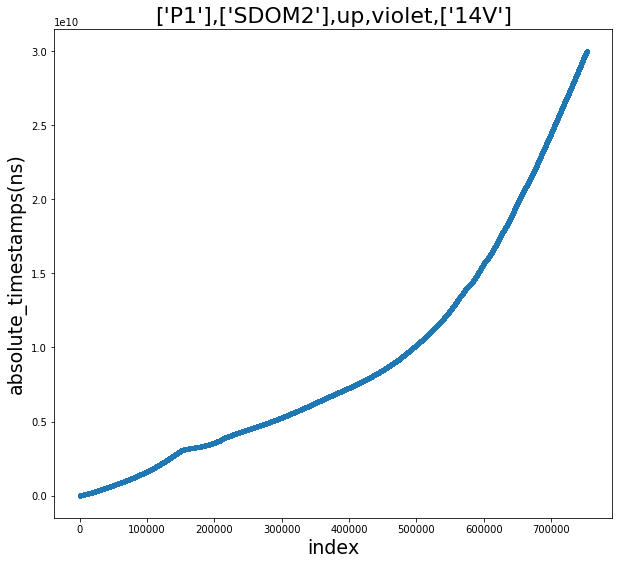

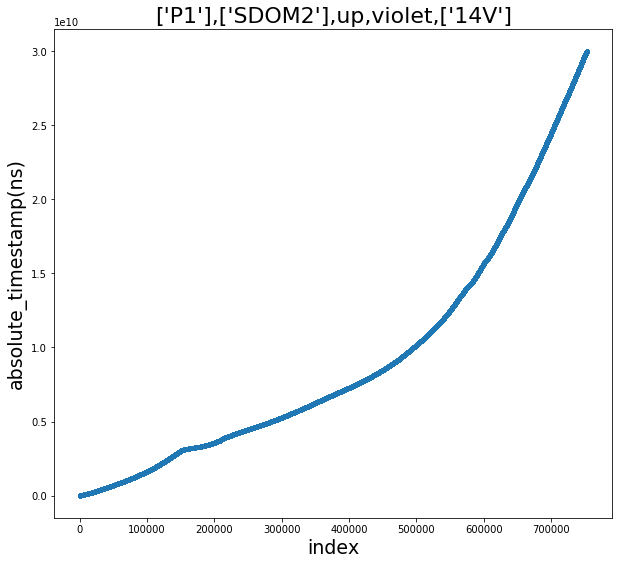

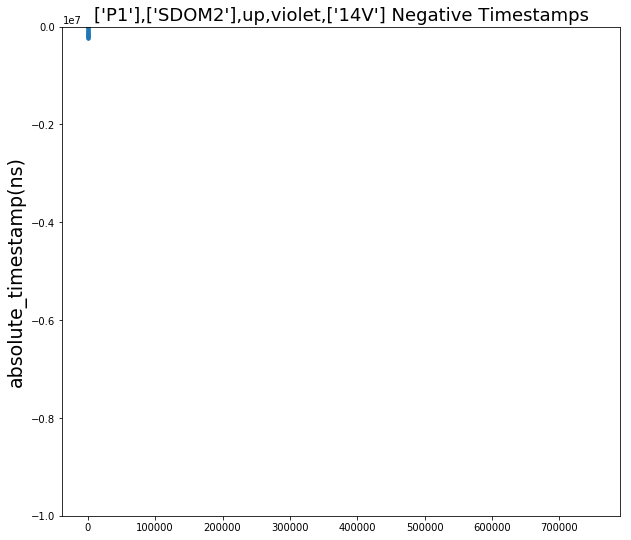

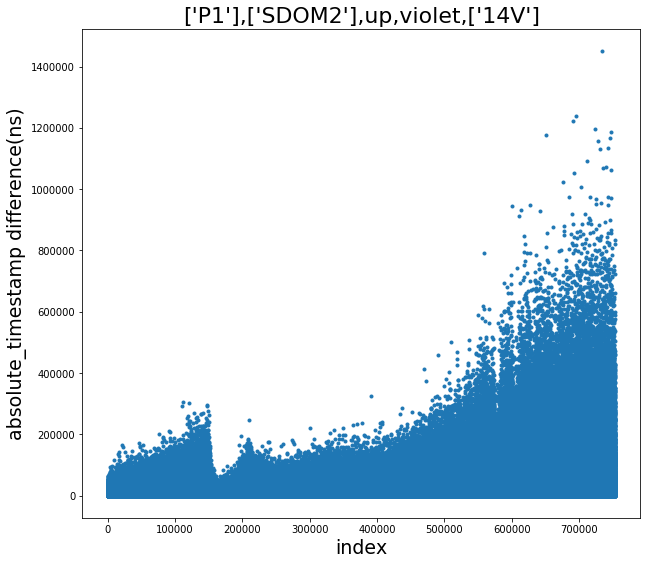

[]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:184: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:187: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:188: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:189: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:190: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:191: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the futur

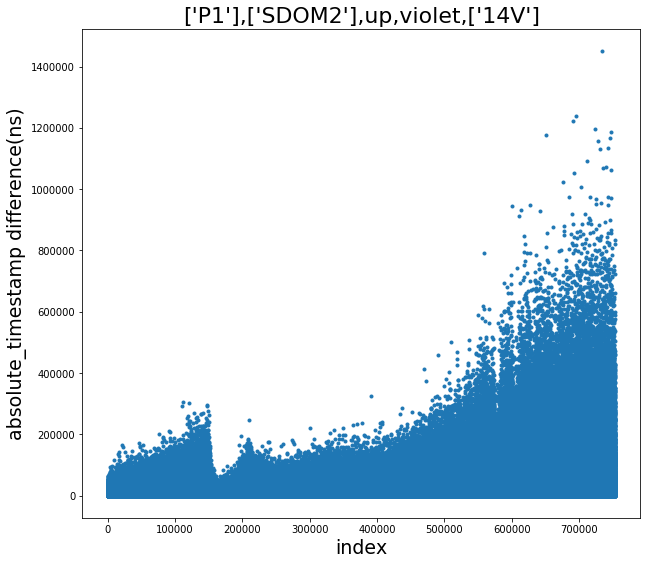

In [18]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps) = c.P_S_used()

In [19]:
r2 = residual()

index_p 0
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[1.8118889e+05 1.0000000e+01 5.0000000e+00]
[1.8118889e+05 1.0000000e+01 5.0000000e+00]
t_res_all length 1
t_res_all length_all 103020
index_p 1
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[1.08176909e+05 1.00000000e+01 5.00000000e+00]
[1.08176909e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 2
t_res_all length_all 229251
index_p 2
   direc: array([[-1.44644383e-11]])
     fun: 1.3268347602264988e-15
 message: 'Optimization terminated successfully.'
    nfev: 59
     nit: 2
  status: 0
 success: True
       x: array(200100.71962379)
200100.71962379423
time_res length 4


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice.


[1.44565757e+05 1.00000000e+01 5.00000000e+00]
[1.44565757e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 6
t_res_all length_all 334164
index_p 3
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 2
[1.29717729e+05 1.00000000e+01 5.00000000e+00]
[1.29717729e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 8
t_res_all length_all 367908
index_p 4
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[1.81302006e+05 1.00000000e+01 5.00000000e+00]
[1.81302006e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 9
t_res_all length_all 378549
index_p 5
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 s

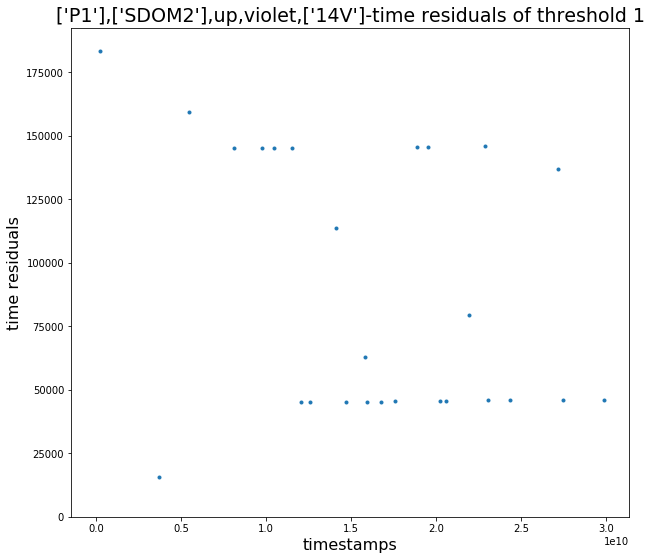

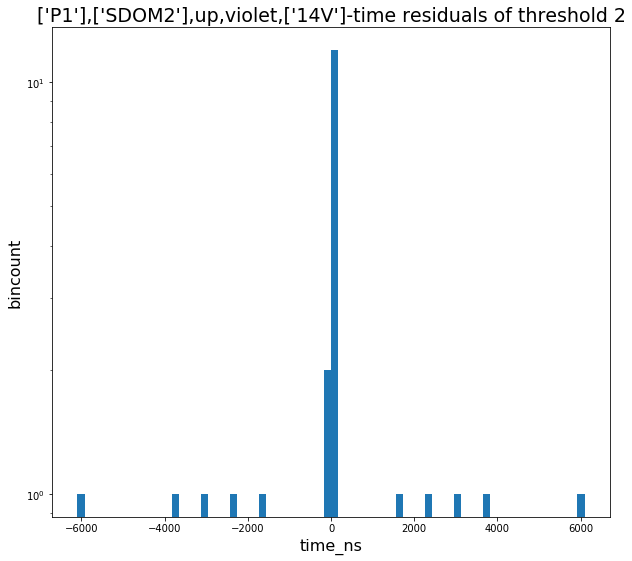

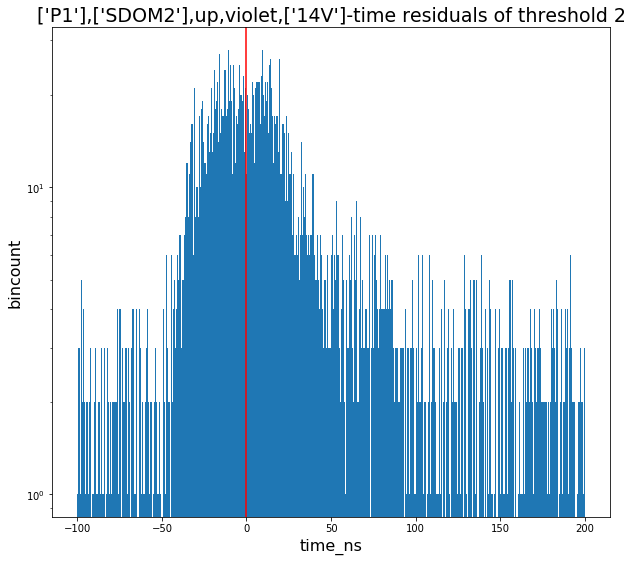

In [20]:
num_events = r2.res(rising_1_elim_3, 100, -100, 7)

In [23]:
e = clean('20181205_092552_UTC_SDOM1_FLASH_SANTACLAUS_P1_blue_both_5000Hz_20V_60s_18339114715.hld_up.hdf5')

percentage of high jumps in the file - 0.0
1114392


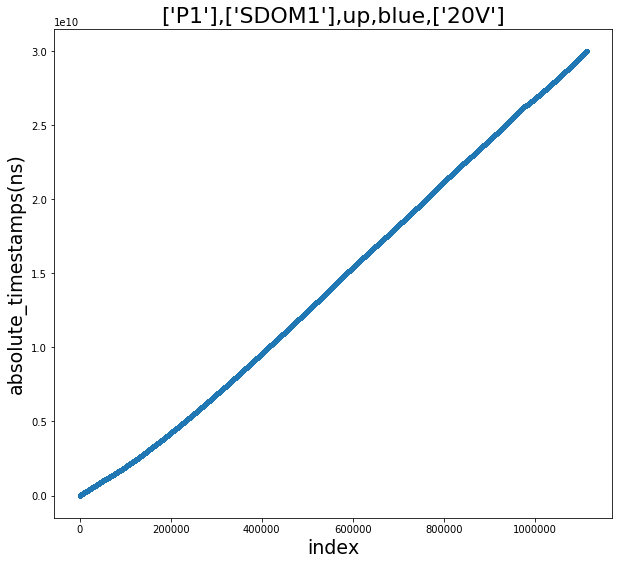

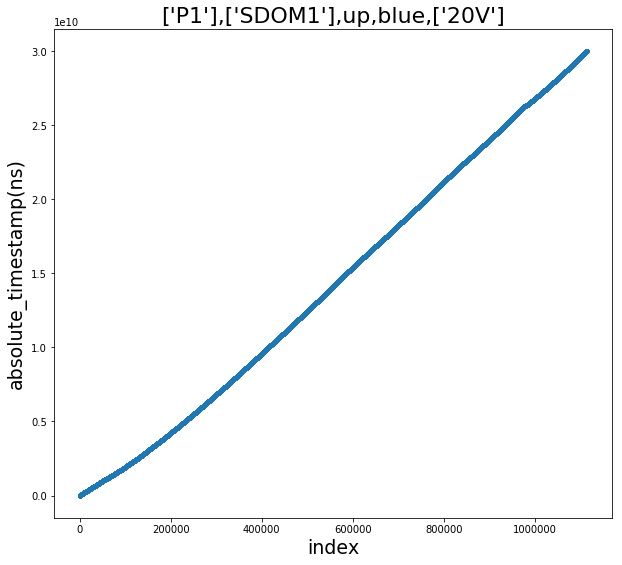

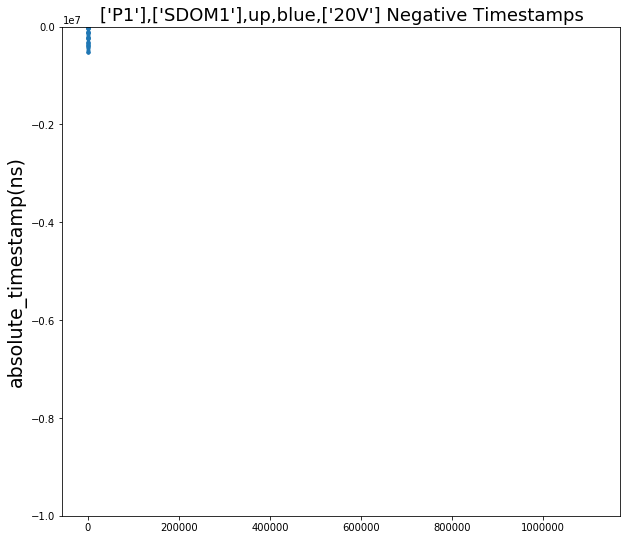

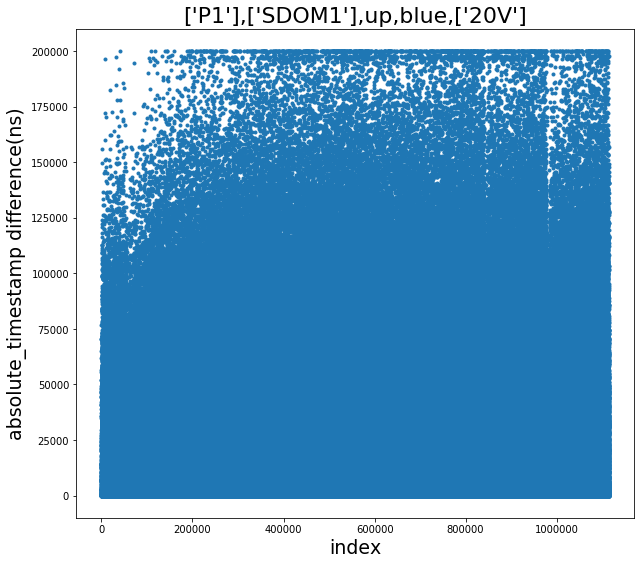

[]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:184: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:187: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:188: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:189: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:190: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:191: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the futur

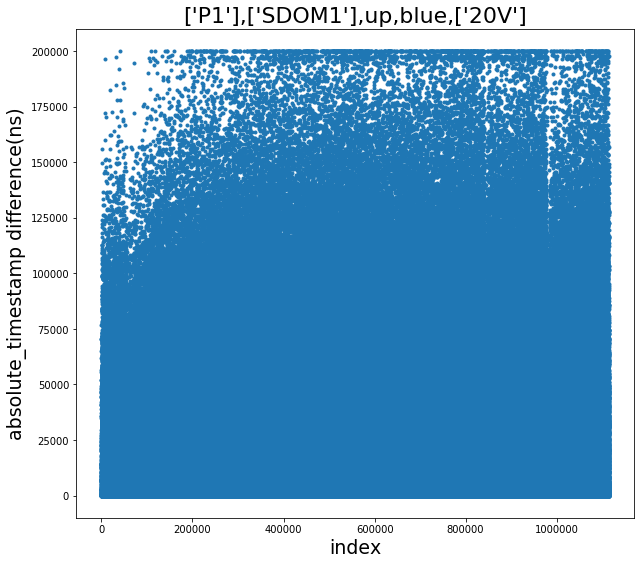

In [24]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps) = e.P_S_used()

In [25]:
r4 = residual()

index_p 0
   direc: array([[1.]])
     fun: 732.5019460222692
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 2
  status: 0
 success: True
       x: array(200100.73235826)
200100.73235825583
time_res length 46
[7.80098409e+04 1.00000000e+01 5.00000000e+00]
[7.80098409e+04 1.00000000e+01 5.00000000e+00]
t_res_all length 46
t_res_all length_all 24877
index_p 1
   direc: array([[7.3285465e-12]])
     fun: 2378.6706378277877
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 2
  status: 0
 success: True
       x: array(200100.73285465)
200100.73285465006
time_res length 208
[7.800972e+04 1.000000e+01 5.000000e+00]
[7.800972e+04 1.000000e+01 5.000000e+00]
t_res_all length 254
t_res_all length_all 120768
index_p 2
   direc: array([[1.17338062e-11]])
     fun: 1226.7399604503255
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 2
  status: 0
 success: True
       x: array(200100.73301351)
200100.73301350858
time_res length 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice.


[1.7811216e+05 1.0000000e+01 5.0000000e+00]
[1.7811216e+05 1.0000000e+01 5.0000000e+00]
t_res_all length 739
t_res_all length_all 222685
index_p 5
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[4.6811385e+04 1.0000000e+01 5.0000000e+00]
[4.6811385e+04 1.0000000e+01 5.0000000e+00]
t_res_all length 740
t_res_all length_all 222776
index_p 6
   direc: array([[2.31881721e-11]])
     fun: 1537.5938253985082
 message: 'Optimization terminated successfully.'
    nfev: 59
     nit: 2
  status: 0
 success: True
       x: array(200100.73289179)
200100.73289179118
time_res length 152
[1.78108995e+05 1.00000000e+01 5.00000000e+00]
[1.78108995e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 892
t_res_all length_all 249884
index_p 7
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
   

t_res_all length 2978
t_res_all length_all 553909
index_p 29
   direc: array([[1.13662635e-11]])
     fun: 467.4214019032432
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 2
  status: 0
 success: True
       x: array(200100.73204025)
200100.73204025053
time_res length 68
[7.817396e+04 1.000000e+01 5.000000e+00]
[7.817396e+04 1.000000e+01 5.000000e+00]
t_res_all length 3046
t_res_all length_all 561063
index_p 30
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[1.32815844e+05 1.00000000e+01 5.00000000e+00]
[1.32815844e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 3047
t_res_all length_all 561093
index_p 31
   direc: array([[7.33439115e-12]])
     fun: 917.1670518349996
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 2
  status: 0
 success: True
       x: array(200100.73343

[7.81958751e+04 1.00000000e+01 5.00000000e+00]
[7.81958751e+04 1.00000000e+01 5.00000000e+00]
t_res_all length 5504
t_res_all length_all 920676
index_p 56
   direc: array([[1.]])
     fun: 4123.242198435702
 message: 'Optimization terminated successfully.'
    nfev: 19
     nit: 2
  status: 0
 success: True
       x: array(200100.73285986)
200100.7328598632
time_res length 366
[1.78312076e+05 1.00000000e+01 5.00000000e+00]
[1.78312076e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 5870
t_res_all length_all 978073
index_p 57
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[1.8483509e+05 1.0000000e+01 5.0000000e+00]
[1.8483509e+05 1.0000000e+01 5.0000000e+00]
t_res_all length 5871
t_res_all length_all 978195
index_p 58
   direc: array([[1.]])
     fun: 543.5620638209614
 message: 'Optimization terminated successfully.'
    

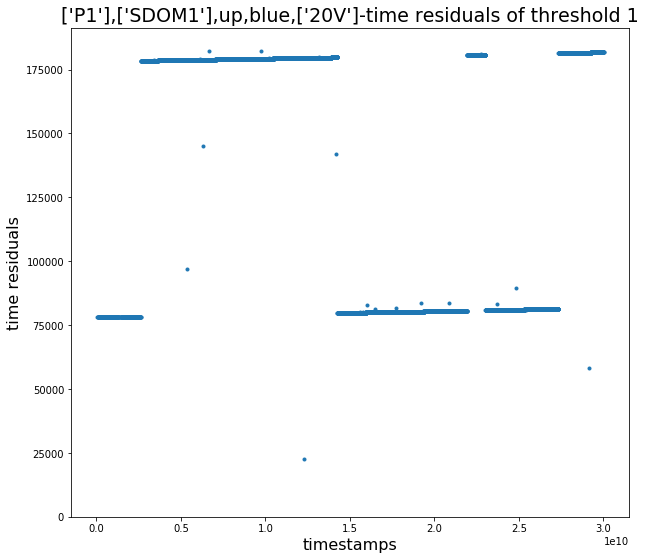

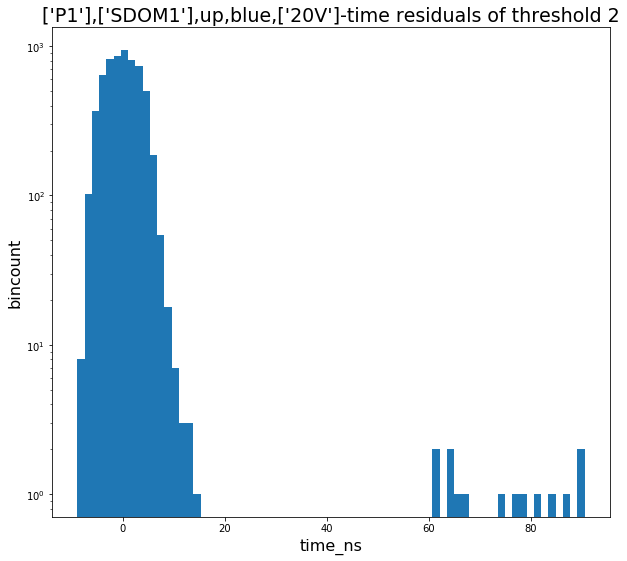

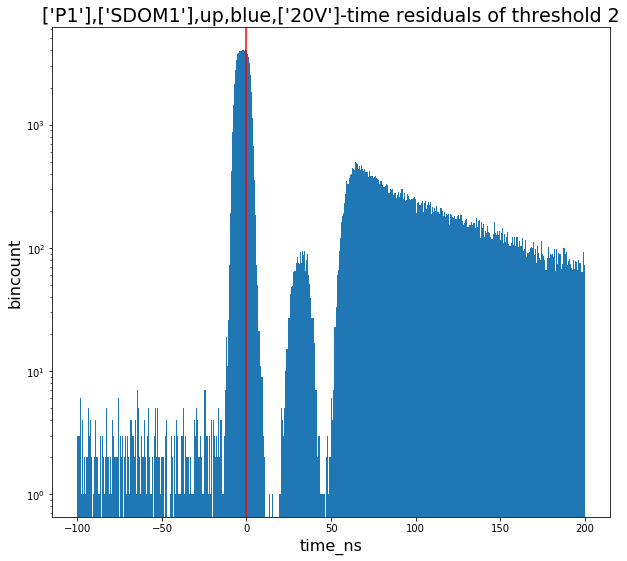

In [26]:
num_events = r4.res(rising_1_elim_3, 90, -90, 10)

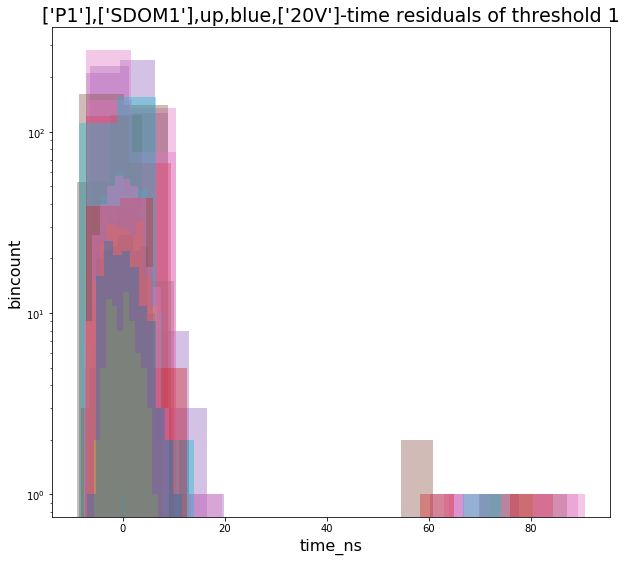

In [28]:
r4.CheckPeak()

In [29]:
f = clean('20181205_092552_UTC_SDOM2_FLASH_SANTACLAUS_P1_blue_both_5000Hz_20V_60s_18339114715.hld_up.hdf5')

percentage of high jumps in the file - 0.0
463822


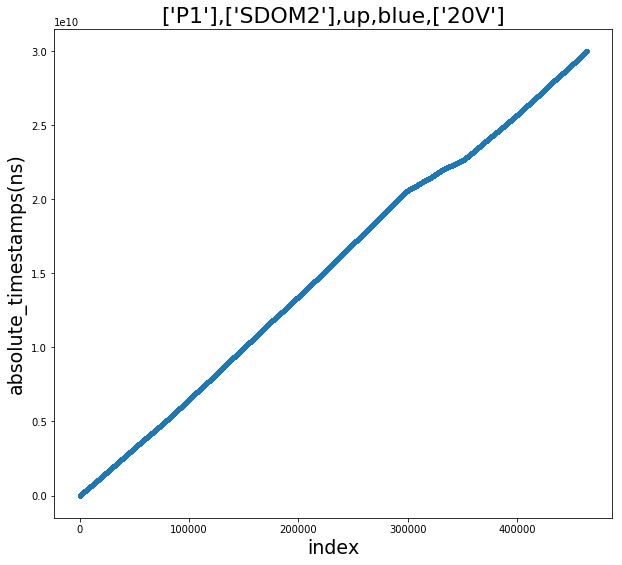

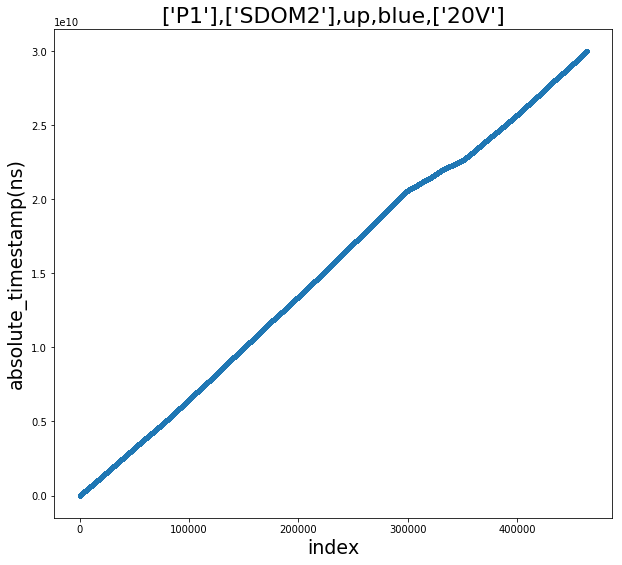

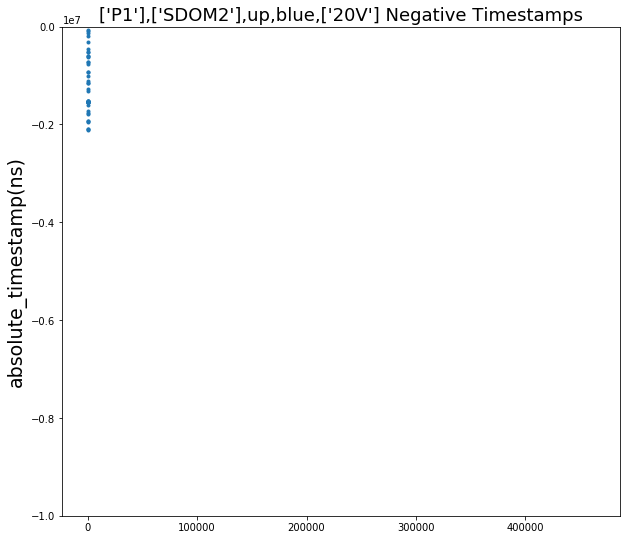

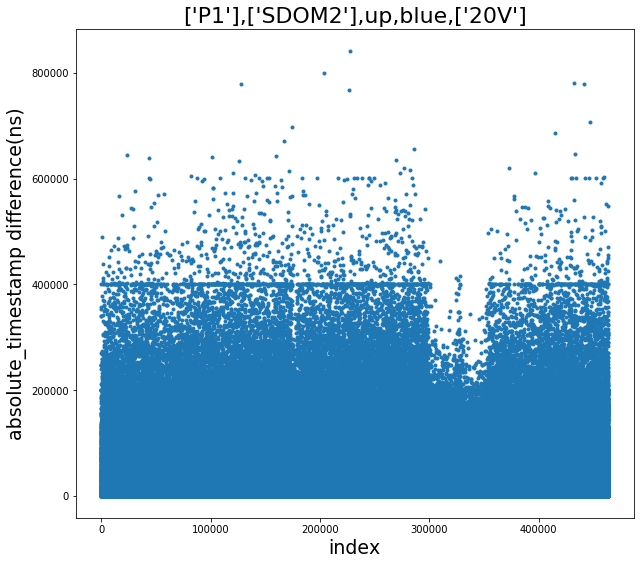

[]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:184: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:187: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:188: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:189: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:190: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:191: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the futur

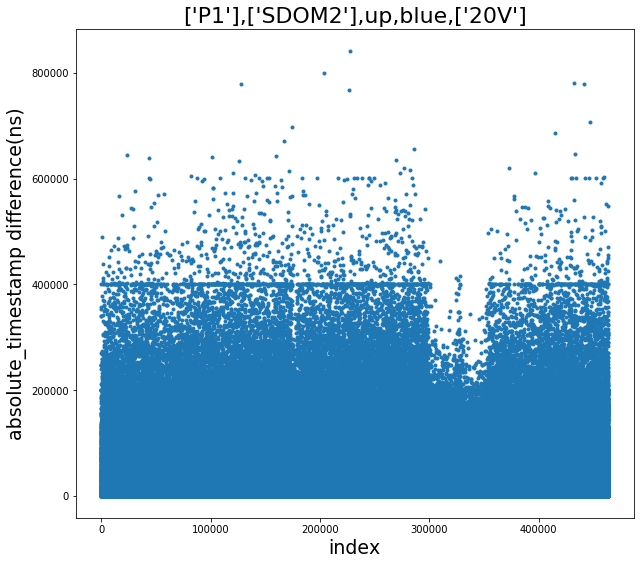

In [30]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps) = f.P_S_used()

In [31]:
r5 = residual()

index_p 0
   direc: array([[1.]])
     fun: 4548.301093587612
 message: 'Optimization terminated successfully.'
    nfev: 46
     nit: 2
  status: 0
 success: True
       x: array(200100.73322764)
200100.73322763946
time_res length 92
[7.82211317e+04 1.21492671e+01 7.70156037e+00]
[7.82225368e+04 1.00000000e+01 5.00000000e+00]
t_res_all length 92
t_res_all length_all 7208
index_p 1
   direc: array([[1.]])
     fun: 12443.910139542317
 message: 'Optimization terminated successfully.'
    nfev: 19
     nit: 2
  status: 0
 success: True
       x: array(200100.73274889)
200100.73274889373
time_res length 339
[7.82222916e+04 5.28116821e+01 6.62837054e+00]
[7.82224603e+04 1.00000000e+01 5.00000000e+00]
t_res_all length 431
t_res_all length_all 34047
index_p 2
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[5.78966987e+04 1.00000000

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice.


   direc: array([[1.]])
     fun: 3602.495416791214
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 2
  status: 0
 success: True
       x: array(200100.73243963)
200100.73243962938
time_res length 112
[7.82269346e+04 1.73827856e+01 5.93832216e+00]
[7.82274526e+04 1.00000000e+01 5.00000000e+00]
t_res_all length 650
t_res_all length_all 50360
index_p 8
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[4.78910572e+04 1.00000000e+01 5.00000000e+00]
[4.78910572e+04 1.00000000e+01 5.00000000e+00]
t_res_all length 651
t_res_all length_all 50653
index_p 9
   direc: array([[2.58218509e-11]])
     fun: 2923.074858874945
 message: 'Optimization terminated successfully.'
    nfev: 59
     nit: 2
  status: 0
 success: True
       x: array(200100.73410739)
200100.7341073872
time_res length 101
[7.81989469e+04 1.75723

[1.21214424e+05 1.00000000e+01 5.00000000e+00]
[1.21214424e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 4351
t_res_all length_all 286309
index_p 32
   direc: array([[3.62065471e-11]])
     fun: 2952.13352804736
 message: 'Optimization terminated successfully.'
    nfev: 58
     nit: 2
  status: 0
 success: True
       x: array(200100.73316371)
200100.7331637071
time_res length 115
[1.78392283e+05 2.01030128e+01 5.78991333e+00]
[1.78392308e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 4466
t_res_all length_all 292402
index_p 33
   direc: array([[6.31764926e-11]])
     fun: 4709.150920924705
 message: 'Optimization terminated successfully.'
    nfev: 59
     nit: 2
  status: 0
 success: True
       x: array(200100.73391931)
200100.7339193074
time_res length 94
[7.83122282e+04 1.35753962e+01 5.97254016e+00]
[7.83130176e+04 1.00000000e+01 5.00000000e+00]
t_res_all length 4560
t_res_all length_all 305138
index_p 34
   direc: array([[1.]])
     fun: 57425.70523489415
 message: '

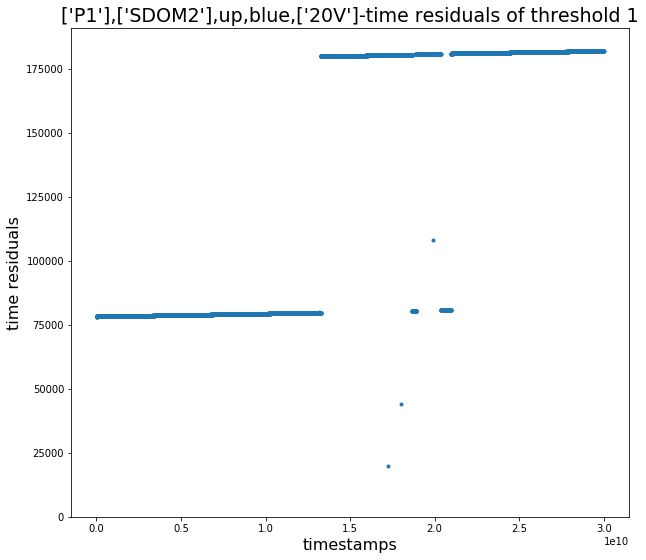

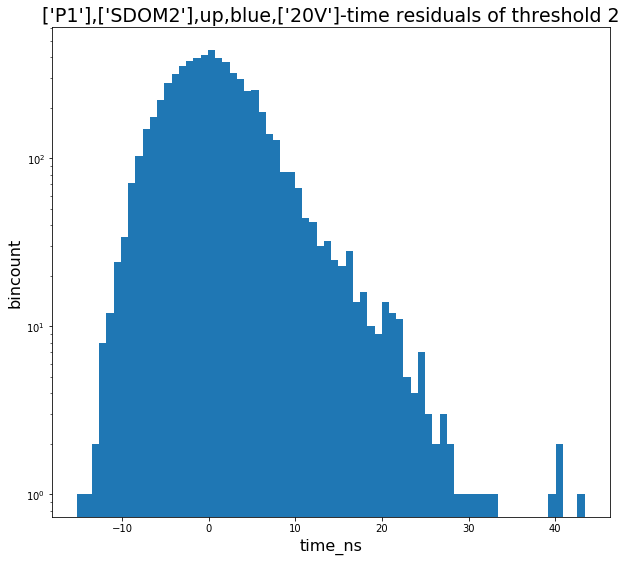

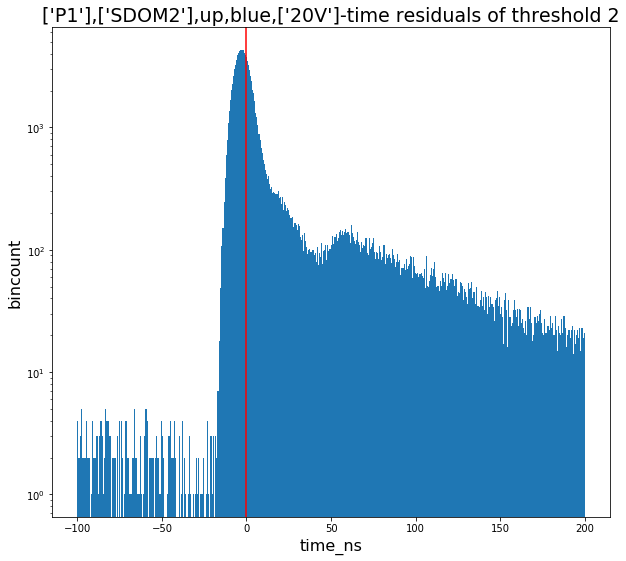

In [32]:
num_events = r5.res(rising_1_elim_3, 40, -40, 10)

In [33]:
g = clean('20181205_092552_UTC_SDOM5_FLASH_SANTACLAUS_P1_blue_both_5000Hz_20V_60s_18339114715.hld_up.hdf5')

percentage of high jumps in the file - 0.0
1258505


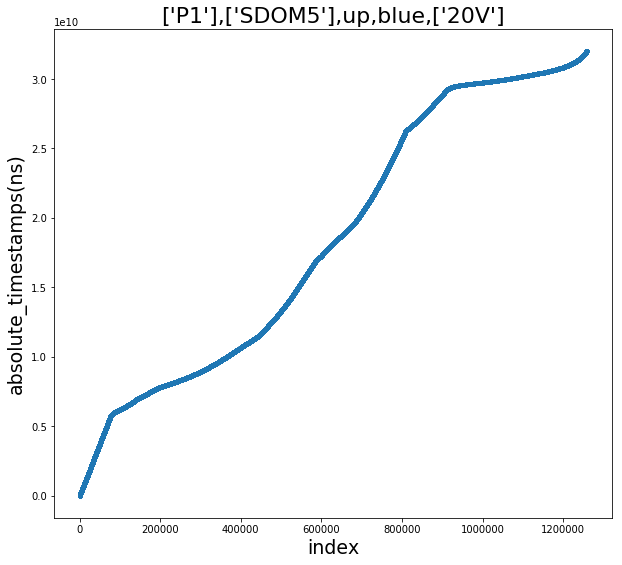

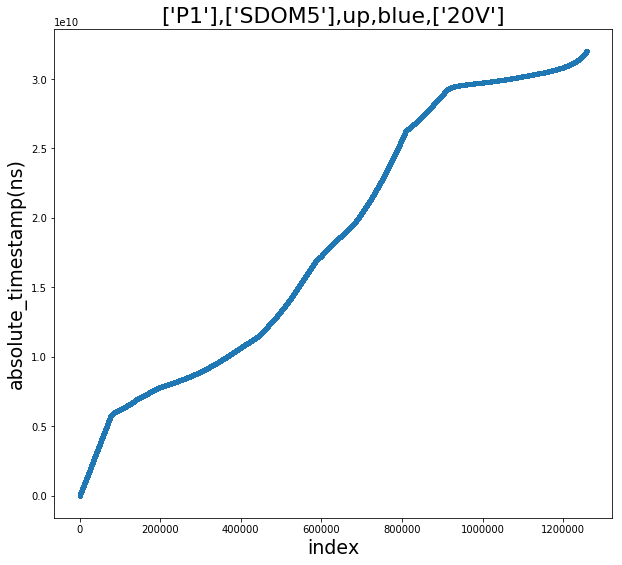

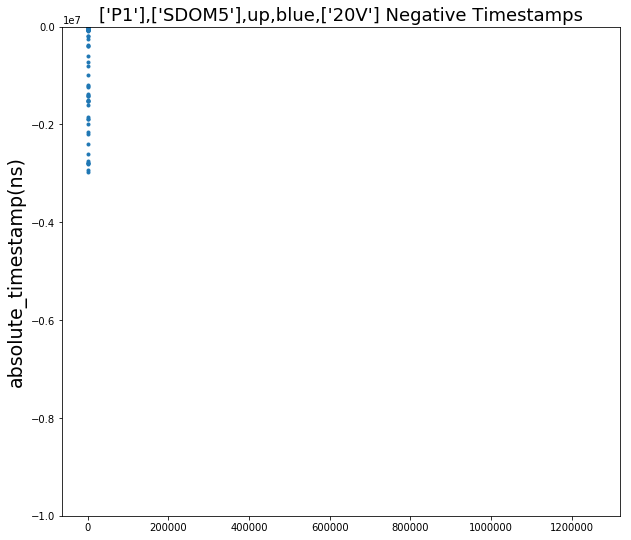

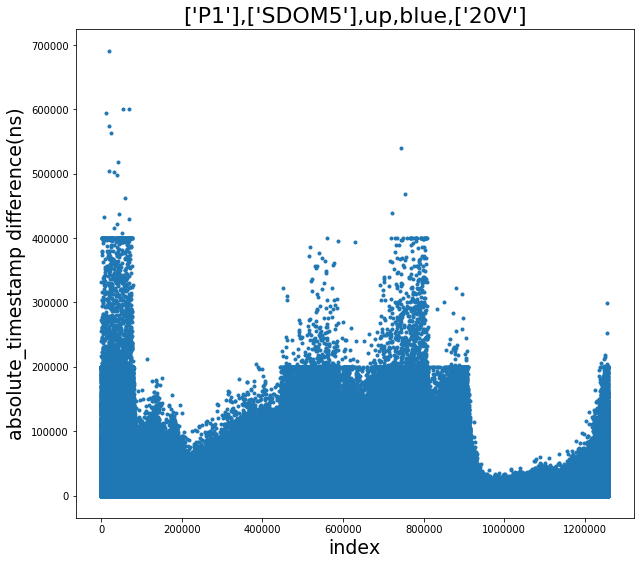

[]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:184: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:187: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:188: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:189: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:190: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:191: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the futur

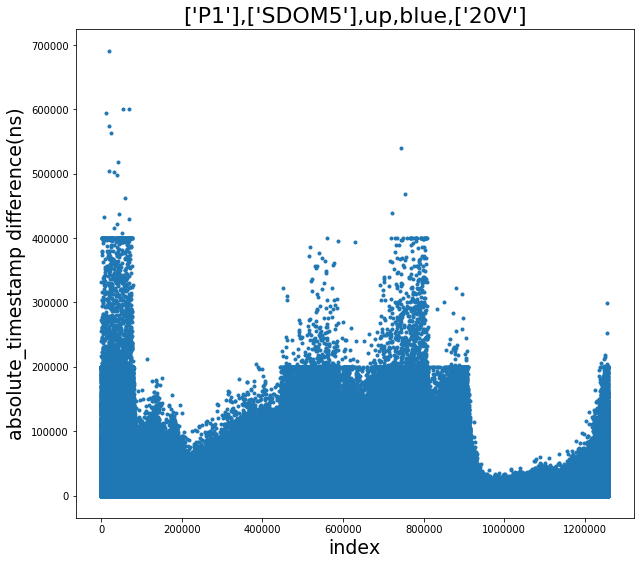

In [34]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps) = g.P_S_used()

In [35]:
r6 = residual()

index_p 0
   direc: array([[2.32559833e-11]])
     fun: 4792756.84161957
 message: 'Optimization terminated successfully.'
    nfev: 59
     nit: 2
  status: 0
 success: True
       x: array(200100.73503505)
200100.7350350499
time_res length 7224
[ 1.00704314e+05  9.54267969e+01 -1.83507248e+01]
[1.00702655e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 7224
t_res_all length_all 91160
index_p 1
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[1.09348404e+05 1.00000000e+01 5.00000000e+00]
[1.09348404e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 7225
t_res_all length_all 91376
index_p 2


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice.


   direc: array([[2.30976922e-11]])
     fun: 17338.38973239553
 message: 'Optimization terminated successfully.'
    nfev: 59
     nit: 2
  status: 0
 success: True
       x: array(200100.73003206)
200100.73003205738
time_res length 920
[ 1.00822280e+05  8.11787982e+01 -6.67329853e+00]
[1.00819837e+05 7.29902240e+02 4.62282896e+00]
t_res_all length 8145
t_res_all length_all 211457
index_p 3
   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[2.23063322e+04 1.00000000e+01 5.00000000e+00]
[2.23063322e+04 1.00000000e+01 5.00000000e+00]
t_res_all length 8146
t_res_all length_all 212008
index_p 4
   direc: array([[3.94987664e-11]])
     fun: 56714.94195859688
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 2
  status: 0
 success: True
       x: array(200100.73003964)
200100.73003964155
time_res length 3070
[ 

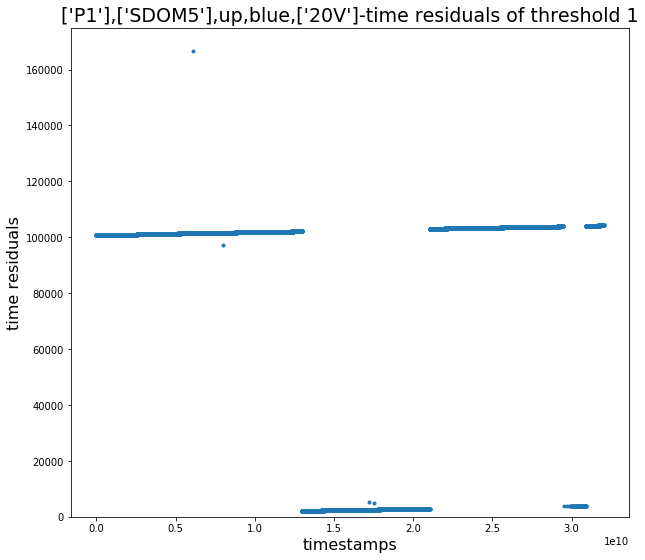

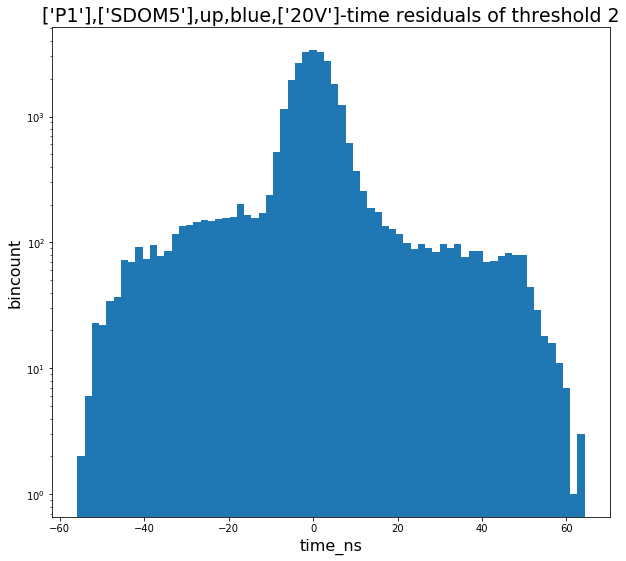

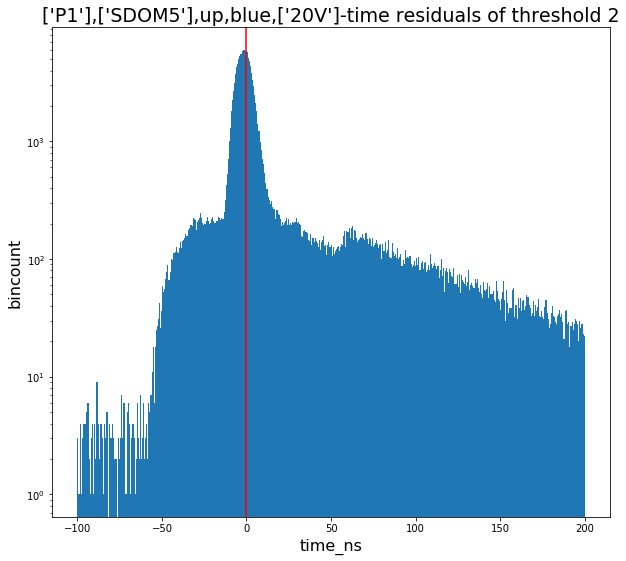

In [36]:
num_events = r6.res(rising_1_elim_3, 50, -50, 5)

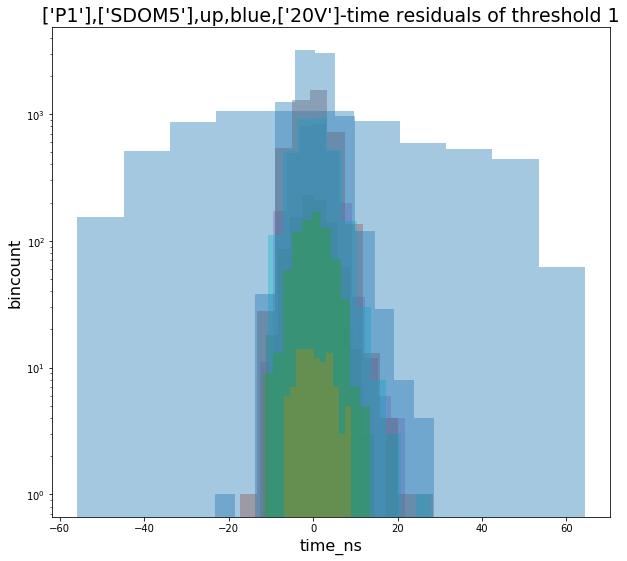

In [37]:
r6.CheckPeak()

In [38]:
h = clean('20181205_092552_UTC_SDOM5_FLASH_SANTACLAUS_P2_violet_both_5000Hz_12V_60s_18339124315.hld_up.hdf5')

percentage of high jumps in the file - 0.0
375878


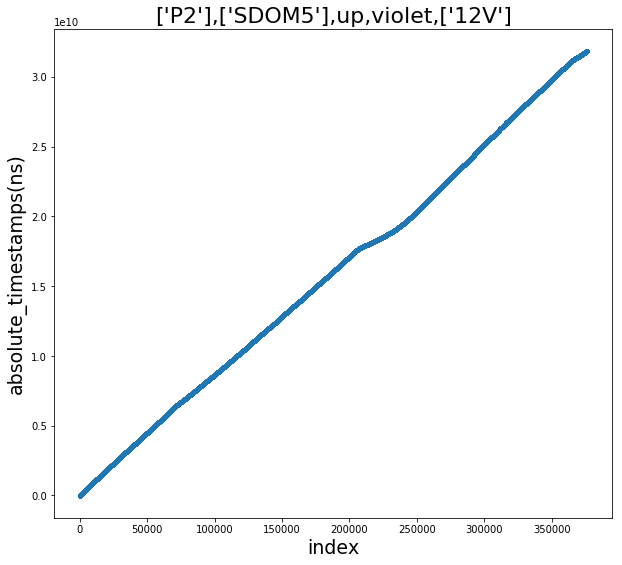

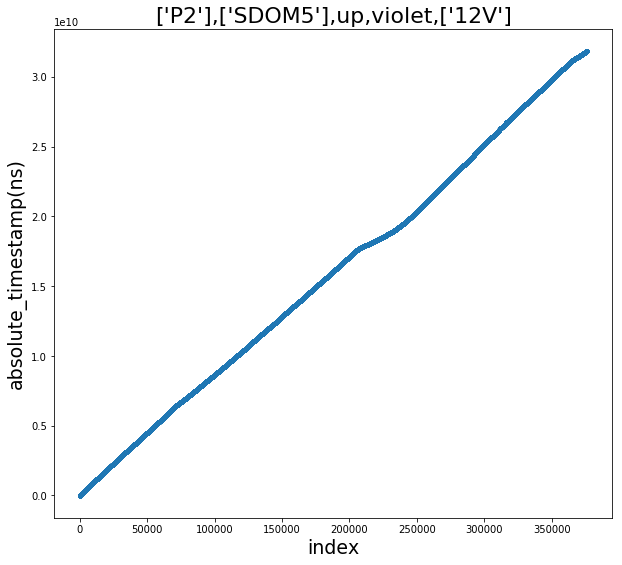

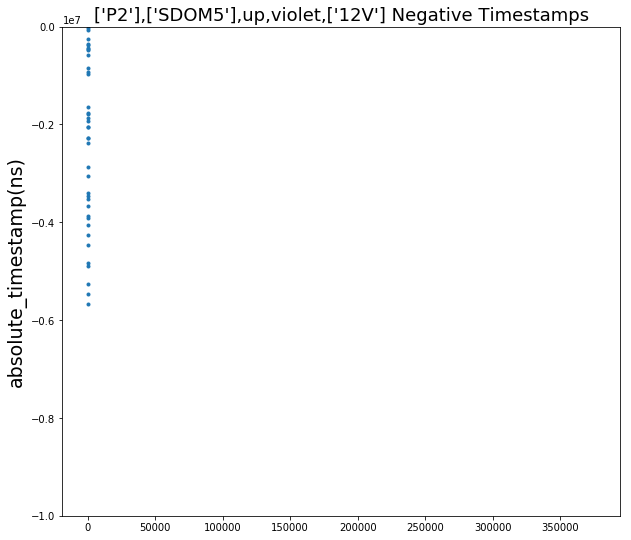

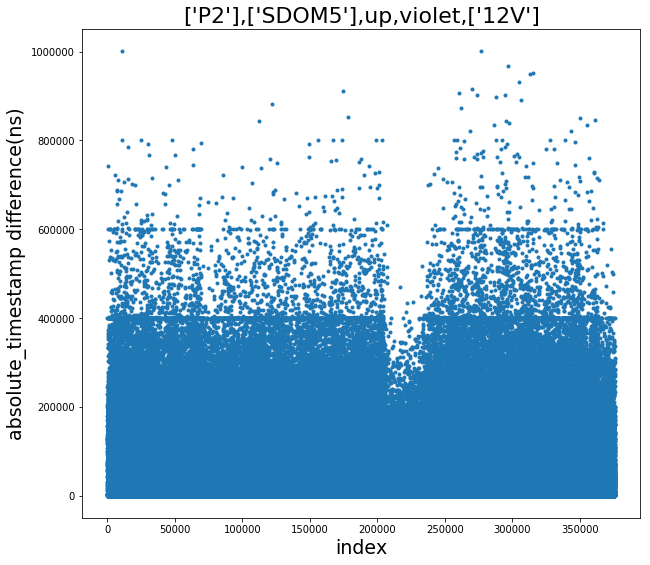

[]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:184: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:187: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:188: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:189: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:190: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:191: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the futur

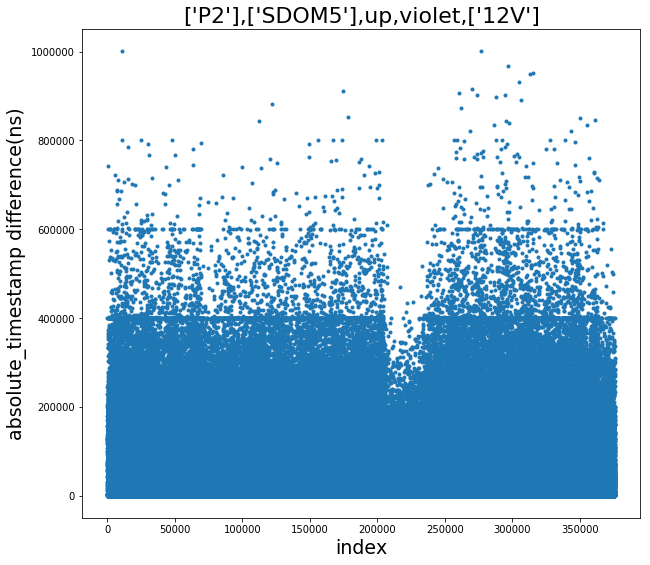

In [39]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps) = h.P_S_used()

In [40]:
r7 = residual()

index_p 0
   direc: array([[1.]])
     fun: 486834256002.11957
 message: 'Optimization terminated successfully.'
    nfev: 71
     nit: 3
  status: 0
 success: True
       x: array(200095.6829224)
200095.68292239768
time_res length 708
[1.5131755e+05 1.0000000e+01 5.0000000e+00]
[1.5131755e+05 1.0000000e+01 5.0000000e+00]
t_res_all length 708
t_res_all length_all 58978
index_p 1
   direc: array([[1.]])
     fun: 1565.0815041928413
 message: 'Optimization terminated successfully.'
    nfev: 19
     nit: 2
  status: 0
 success: True
       x: array(200100.32169443)
200100.32169442554
time_res length 77
[1.38169204e+05 6.42299459e+00 4.60456328e+00]
[1.38170188e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 785
t_res_all length_all 66562
index_p 2
   direc: array([[1.]])
     fun: 437.6611762013498
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 2
  status: 0
 success: True
       x: array(200100.31949129)
200100.31949128828
time_res length 36
[3.82383356e+04

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice.


   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[1.04136594e+05 1.00000000e+01 5.00000000e+00]
[1.04136594e+05 1.00000000e+01 5.00000000e+00]
t_res_all length 1506
t_res_all length_all 136830
index_p 6
   direc: array([[1.]])
     fun: 14368.168616477278
 message: 'Optimization terminated successfully.'
    nfev: 19
     nit: 2
  status: 0
 success: True
       x: array(200100.32100452)
200100.32100452253
time_res length 706
[3.82923126e+04 5.46152381e+01 5.48899959e+00]
[3.82922873e+04 1.00000000e+01 5.00000000e+00]
t_res_all length 2212
t_res_all length_all 197336
index_p 7
   direc: array([[-1.01666347e-11]])
     fun: 1263.862332240612
 message: 'Optimization terminated successfully.'
    nfev: 59
     nit: 2
  status: 0
 success: True
       x: array(200100.32132948)
200100.32132948277
time_res length 87
[3.82624409e+04 6

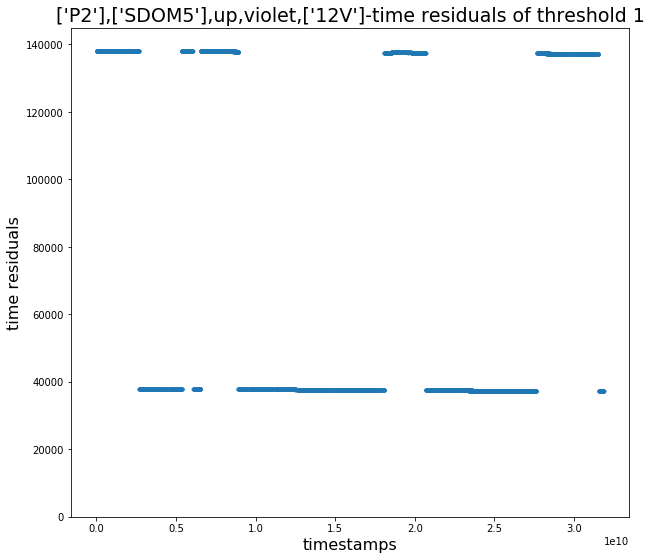

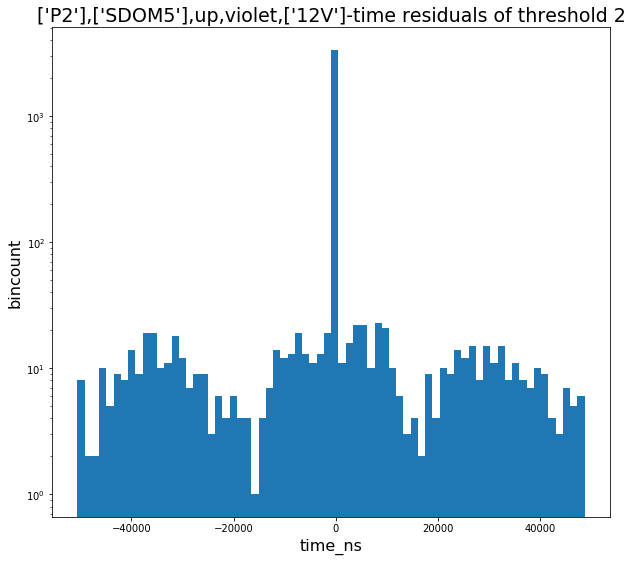

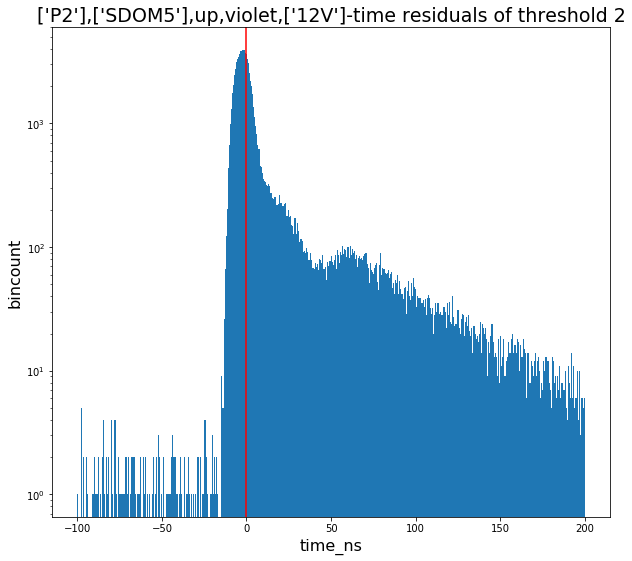

In [43]:
num_events = r7.res(rising_1_elim_3, 30, -30, 4)

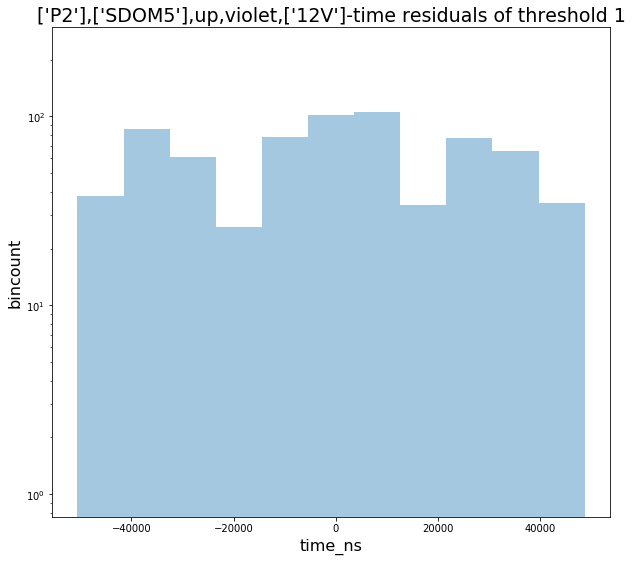

In [44]:
r7.CheckPeak()